<a href="https://colab.research.google.com/github/mdersu/Projects/blob/main/Fundamental_Analysis_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start


In [1]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd

# Load the Excel file to inspect its content
file_path = '/content/drive/MyDrive/Google Colab /fintables_radar_all_filters.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names


['fintables_radar_all_filters ']

# Asset Selection and Analysis

In [384]:
import pandas as pd

# Define the file path to the Excel file
file_path = '/content/drive/MyDrive/Google Colab /fintables_radar.xlsx'

# Function to convert Excel to CSV and display columns and preview data
def process_excel(file_path):
    try:
        # Load the Excel file
        excel_data = pd.ExcelFile(file_path)

        # List all sheet names (if multiple sheets exist)
        print("Available Sheets:", excel_data.sheet_names)

        # Load the first sheet (adjust sheet_name if specific one is needed)
        df = excel_data.parse(sheet_name=0)

        # Convert Excel to CSV
        csv_path = file_path.replace('.xlsx', '.csv')
        df.to_csv(csv_path, index=False)
        print(f"Excel file converted to CSV: {csv_path}")

        # Display column names and first few rows
        print("Column Names:", df.columns)
        print("\nFirst 5 Rows:")
        print(df.head())

        return df

    except Exception as e:
        print("Error:", e)

# Run the function
dataframe = process_excel(file_path)


Available Sheets: ['data']
Excel file converted to CSV: /content/drive/MyDrive/Google Colab /fintables_radar.csv
Column Names: Index(['Şirket', 'Kapanış Fiyatı', 'Günlük Getiri', 'Günlük Hacim',
       'Piyasa Değeri', 'Fiili Dolaşım Oranı', 'Fiili Dolaşım Pay Adedi',
       'F/K', 'FD/Satış', 'PEG', 'PD/DD', 'FD/FAVÖK', 'Özkaynak Karlılığı',
       'Net Kar Marjı', 'Brüt Kar Marjı', 'FAVÖK Marjı (Çeyreklik)',
       'Net Kar Marjı Değişimi', 'FAVÖK Marjı Değişimi',
       'Brüt Kar Marjı (Çeyreklik) Değişimi', 'ROIC',
       'Net Kar Marjı (Çeyreklik) Değişimi', 'Brüt Kar Marjı Değişimi',
       'Brüt Kar Marjı (Çeyreklik)', 'Net Kar Marjı (Çeyreklik)',
       'FAVÖK Marjı', 'Aktif Karlılık', 'Kaldıraç Oranı', 'Nakit Oran',
       'Likidite Oranı', 'Net YPP/Piyasa Değeri', 'Net Borç/FAVÖK',
       'Finansal Borç Oranı', 'Cari Oran', 'Çeyreklik Satışlar Değişimi',
       'Çeyreklik FAVÖK Değişimi', 'Çeyreklik Net Kar Değişimi',
       'Yıllık Net Kar Değişimi', 'Yıllık FAVÖK Değişimi',

Filtered companies saved to: /content/Historical_Price_Charts/filtered_companies.csv


<ipython-input-385-9cd1c1e4cc1b>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x600 with 0 Axes>

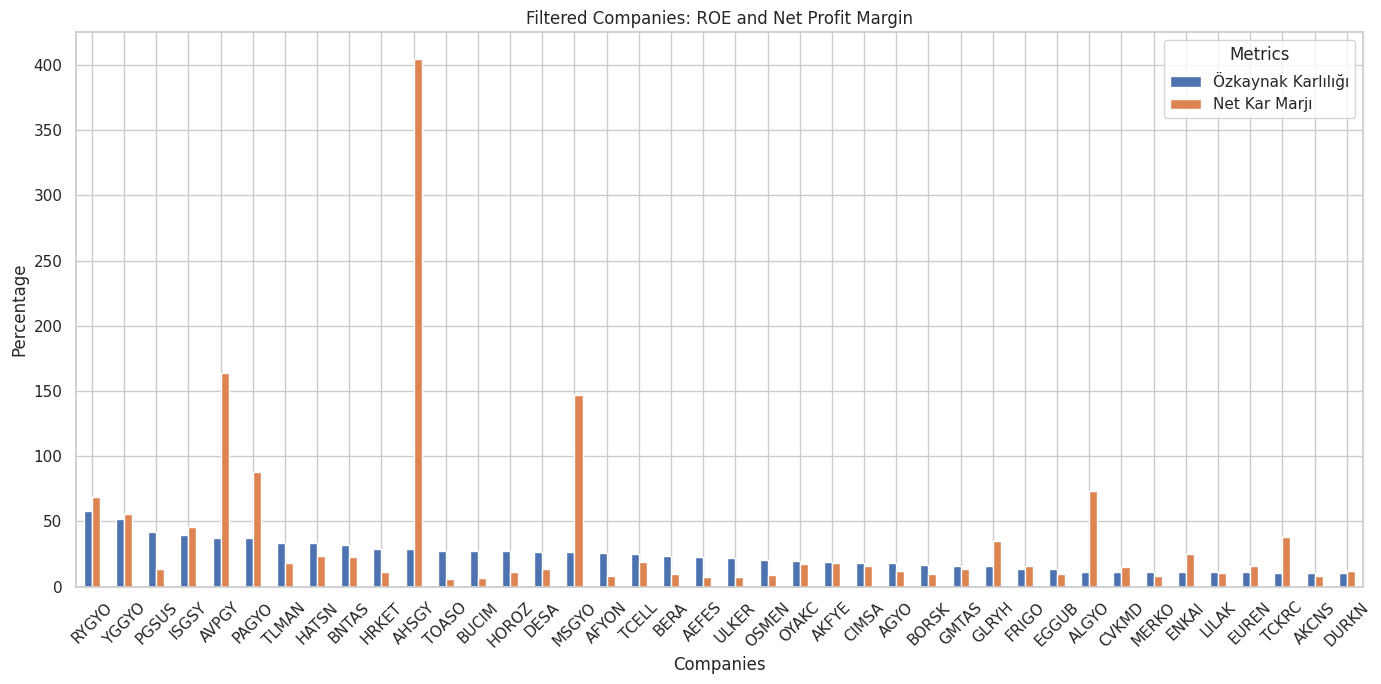

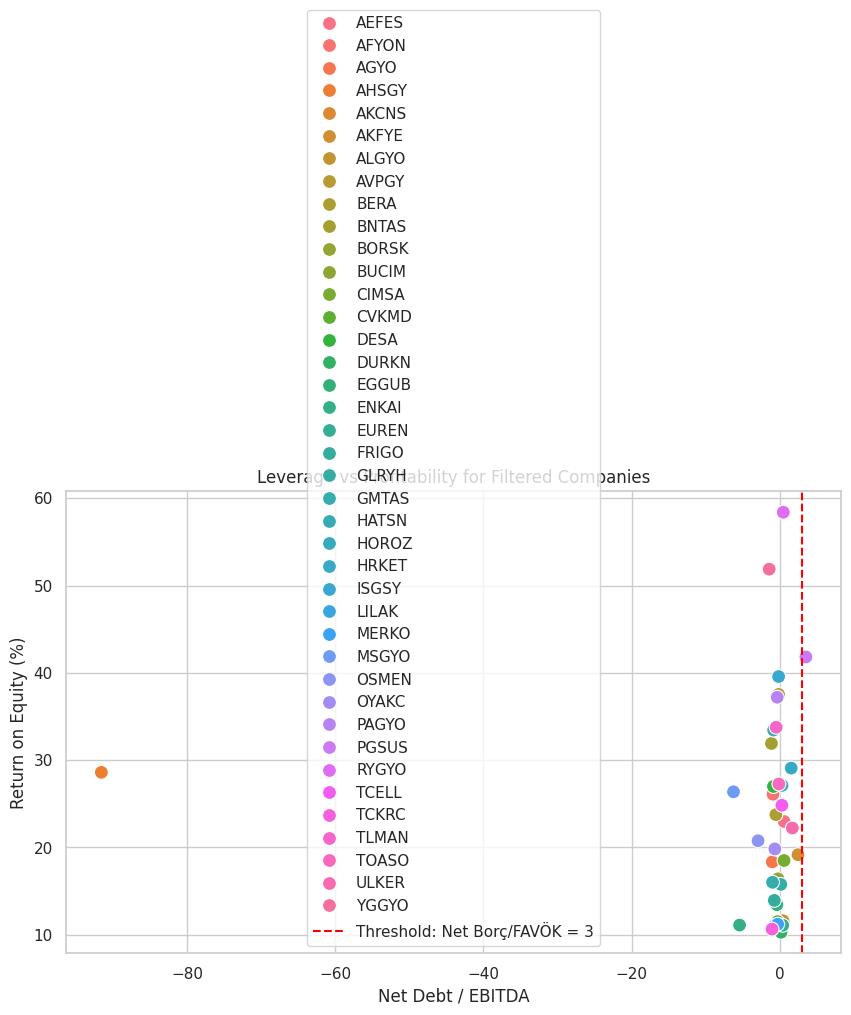

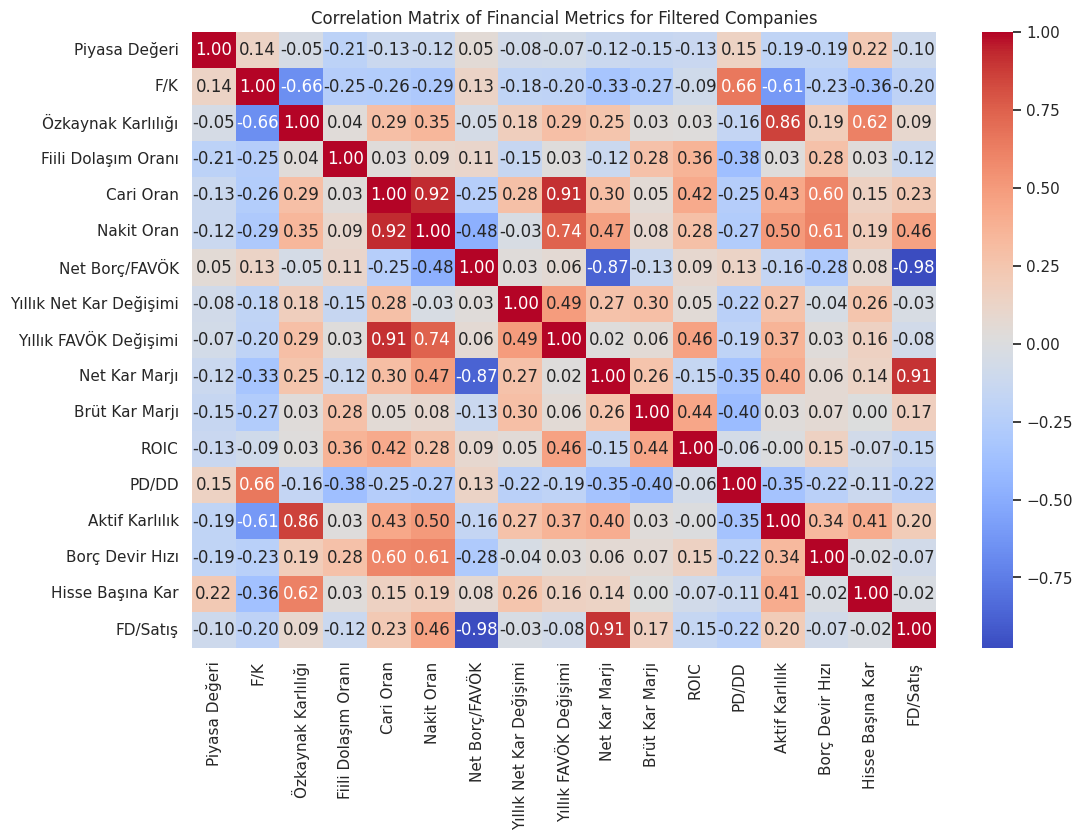

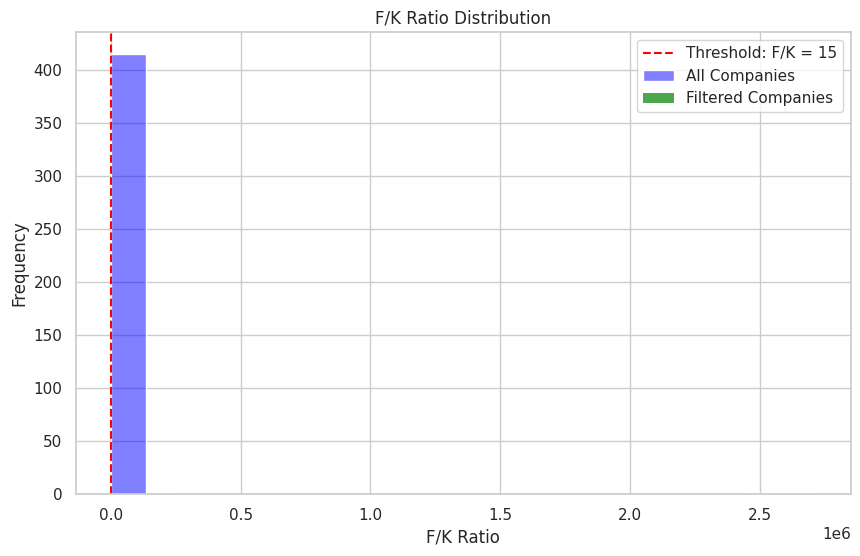

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Veri yükleme ve seçili sütunlarla filtreleme (önceki koddan)
csv_file_path = r"/content/drive/MyDrive/Google Colab /fintables_radar.csv"
df = pd.read_csv(csv_file_path)

selected_columns = [
    'Şirket', 'Piyasa Değeri', 'F/K', 'Özkaynak Karlılığı', 'Fiili Dolaşım Oranı',
    'Cari Oran', 'Nakit Oran', 'Net Borç/FAVÖK', 'Yıllık Net Kar Değişimi',
    'Yıllık FAVÖK Değişimi', 'Net Kar Marjı', 'Brüt Kar Marjı', 'ROIC', 'PD/DD','Aktif Karlılık','Borç Devir Hızı','Hisse Başına Kar','FD/Satış'
]
filtered_df = df[selected_columns]

def custom_filter(row):
    return (
        row['F/K'] > 0 and row['F/K'] < 20 and  # Adjusted for Turkish market conditions
        row['Özkaynak Karlılığı'] > 10 and     # Adjusted for sector-specific performance
        row['Cari Oran'] > 1.1 and             # Adjusted for liquidity norms
        row['Nakit Oran'] > 0.5 and            # Minimum cash ratio for stability
        row['Net Borç/FAVÖK'] < 4 and          # Higher debt tolerance
        row['Net Kar Marjı'] > 5 and           # Slightly lower net margin threshold
        row['Brüt Kar Marjı'] > 10 and         # Adjusted for competitive sectors
        row['PD/DD'] < 3                      # Price/Book ratio threshold
    )

filtered_df['Uygun'] = filtered_df.apply(custom_filter, axis=1)
filtered_companies = filtered_df[filtered_df['Uygun'] == True]

# Save filtered companies to /content/Historical_Price_Charts
output_directory = "/content/Historical_Price_Charts"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

output_csv_path = os.path.join(output_directory, "filtered_companies.csv")
filtered_companies.to_csv(output_csv_path, index=False)
print(f"Filtered companies saved to: {output_csv_path}")

# 1. Bar Chart: Compare key metrics of filtered companies
plt.figure(figsize=(12, 6))
filtered_companies.sort_values('Özkaynak Karlılığı', ascending=False).plot(
    x='Şirket', y=['Özkaynak Karlılığı', 'Net Kar Marjı'], kind='bar', figsize=(14, 7))
plt.title('Filtered Companies: ROE and Net Profit Margin')
plt.ylabel('Percentage')
plt.xlabel('Companies')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Analyze leverage vs profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_companies, x='Net Borç/FAVÖK', y='Özkaynak Karlılığı', hue='Şirket', s=100)
plt.title('Leverage vs Profitability for Filtered Companies')
plt.xlabel('Net Debt / EBITDA')
plt.ylabel('Return on Equity (%)')
plt.axvline(3, color='red', linestyle='--', label='Threshold: Net Borç/FAVÖK = 3')
plt.legend(loc='best')
plt.show()

# 3. Heatmap: Correlation matrix of filtered companies
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_companies.drop(columns=['Şirket', 'Uygun']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Financial Metrics for Filtered Companies')
plt.show()

# 4. Histogram: Distribution of F/K ratios
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='F/K', bins=20, color='blue', alpha=0.5, label='All Companies')
sns.histplot(data=filtered_companies, x='F/K', bins=20, color='green', alpha=0.7, label='Filtered Companies')
plt.axvline(15, color='red', linestyle='--', label='Threshold: F/K = 15')
plt.title('F/K Ratio Distribution')
plt.xlabel('F/K Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AEFES.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AFYON.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AGYO.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AHSGY.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AKCNS.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker AKFYE.IS: 'y1' is not 1-dimensional
[*********************100%***********************]  1 of 1 completed
ERROR:root:Error fetching data for ticker ALGYO.IS

All charts and data saved in folder: /content/Historical_Price_Charts


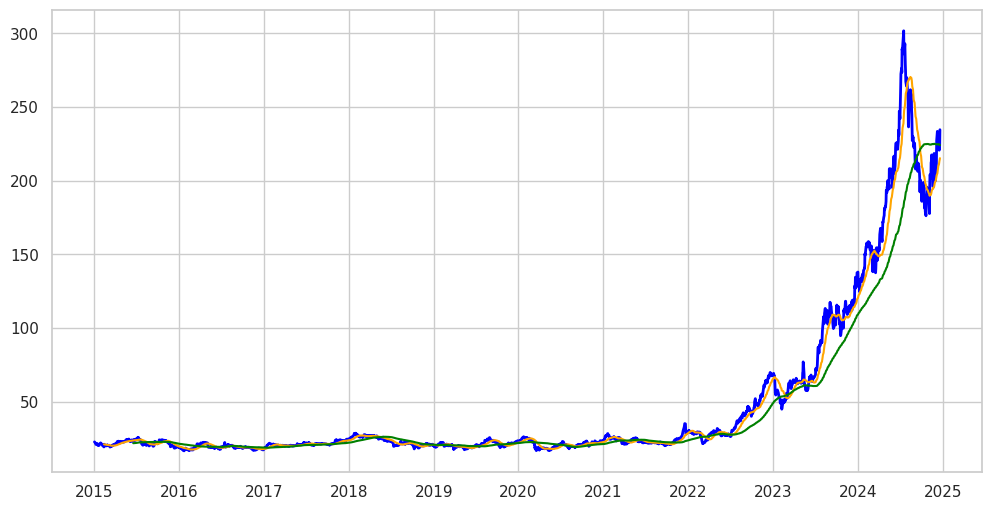

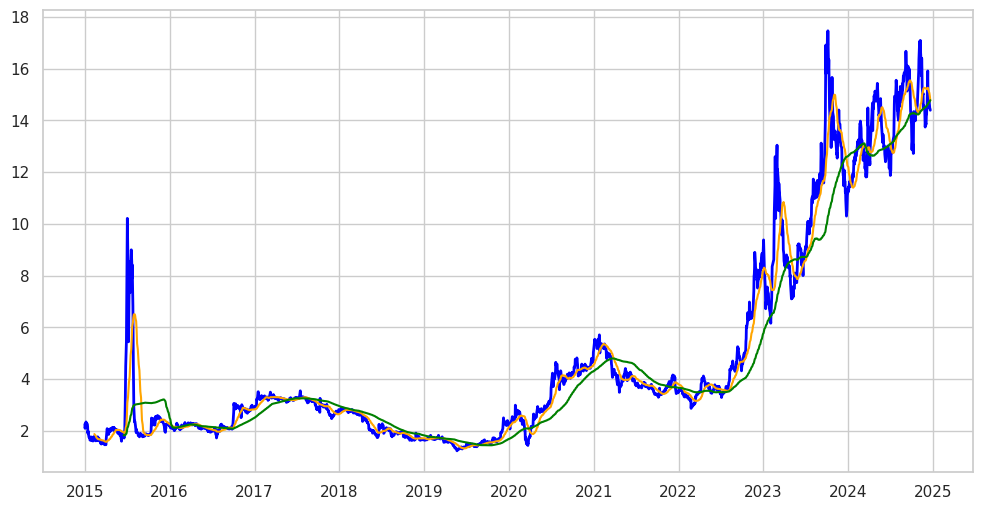

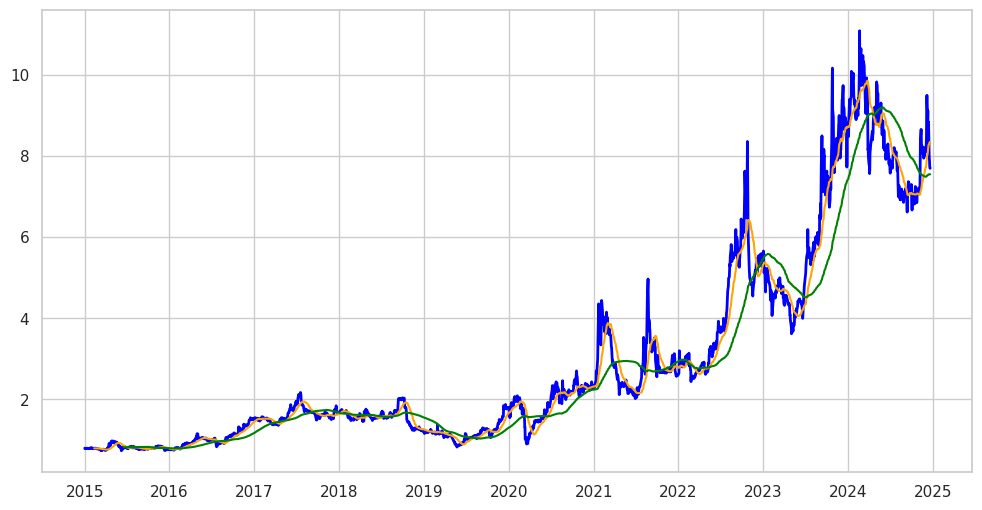

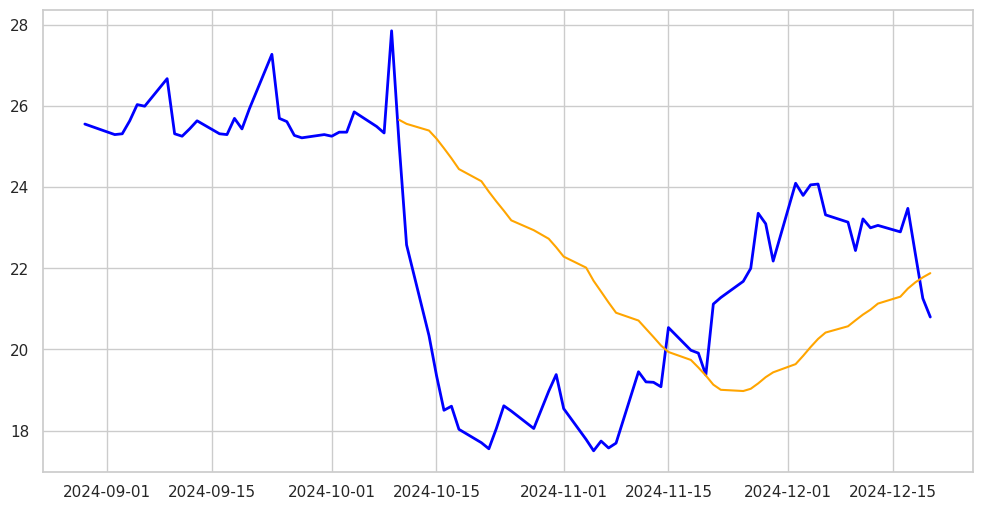

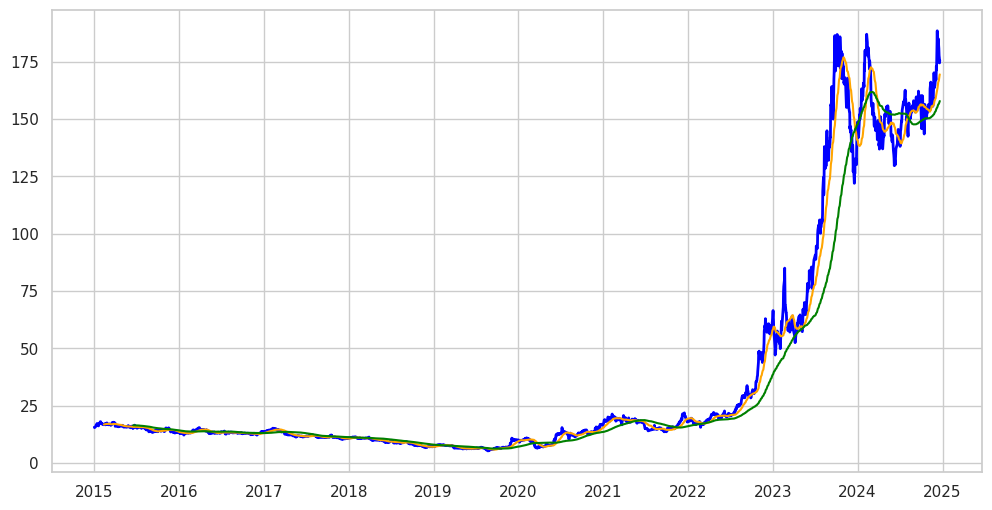

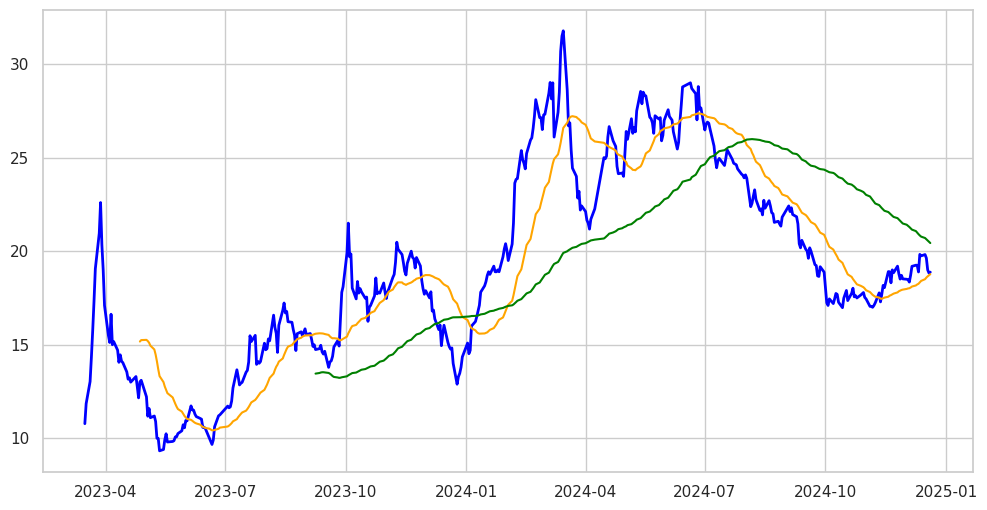

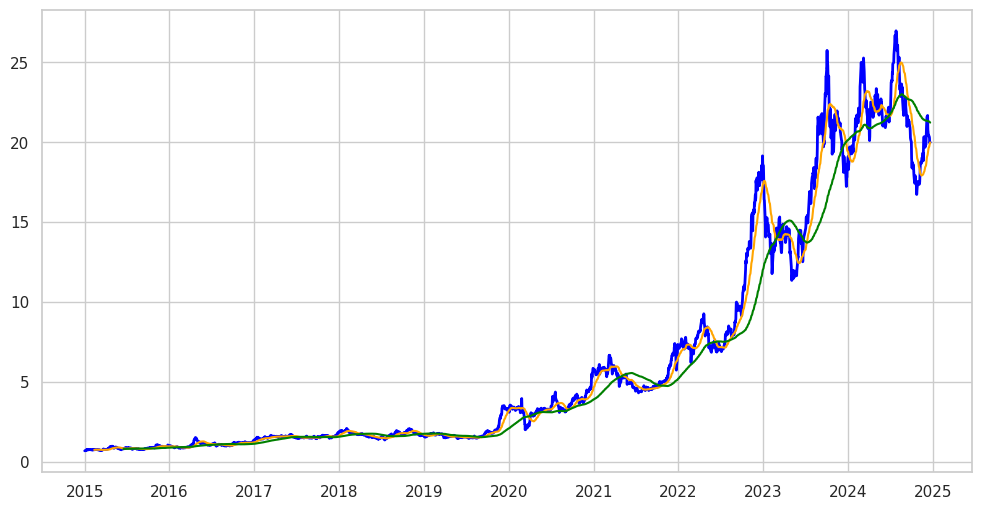

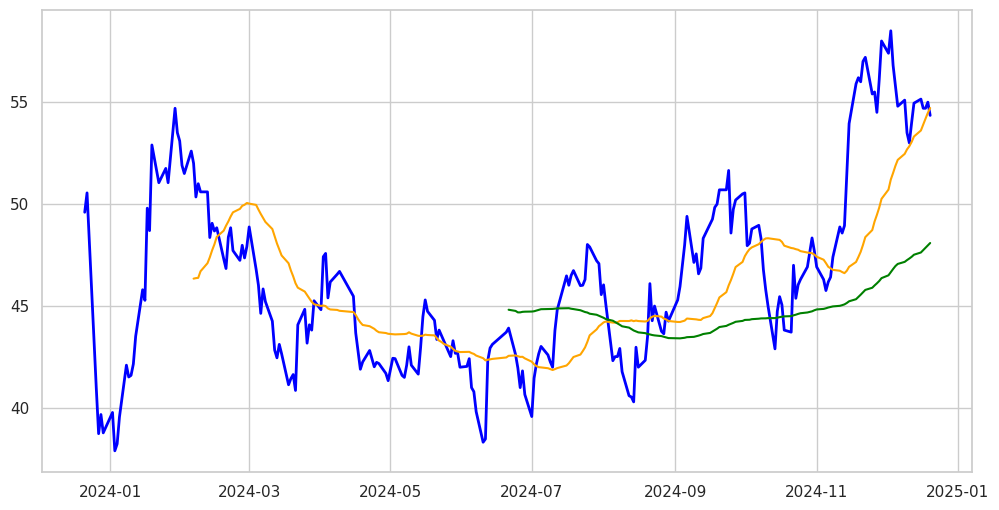

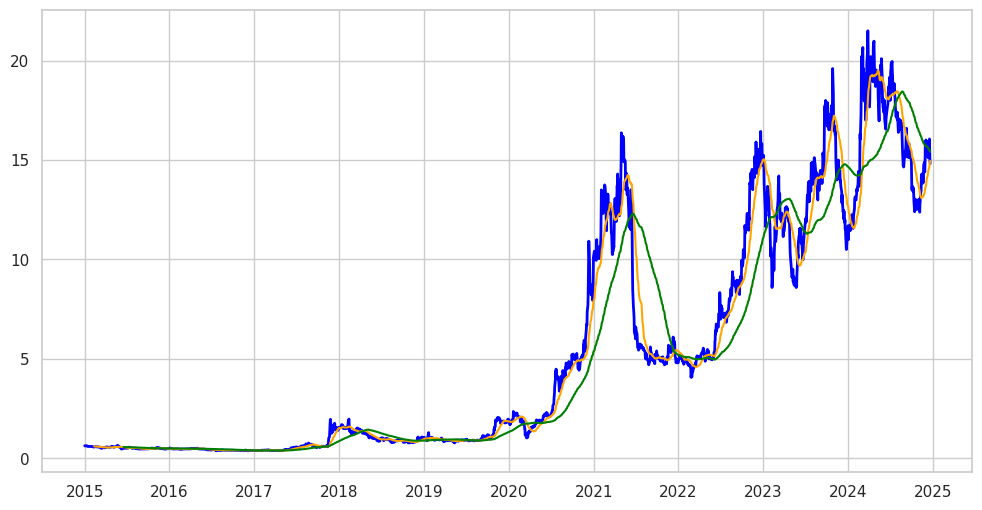

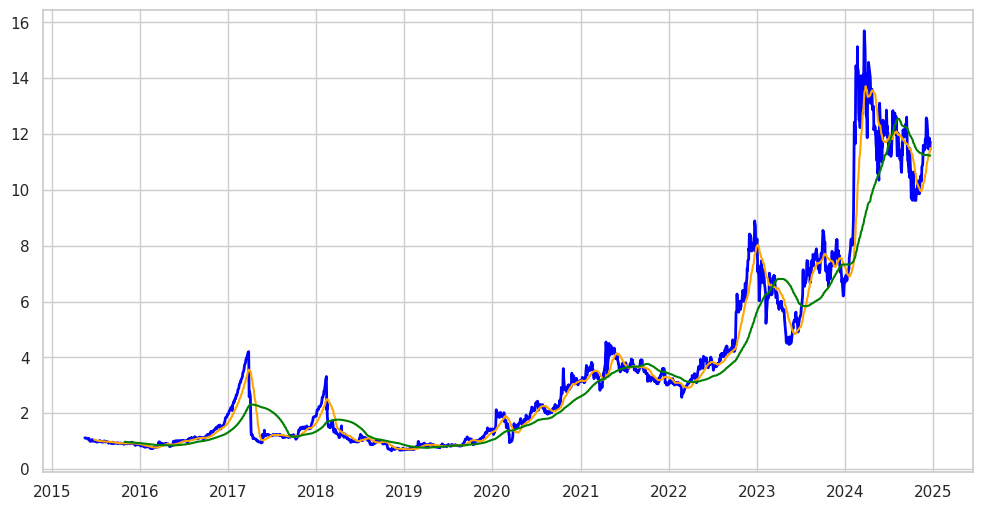

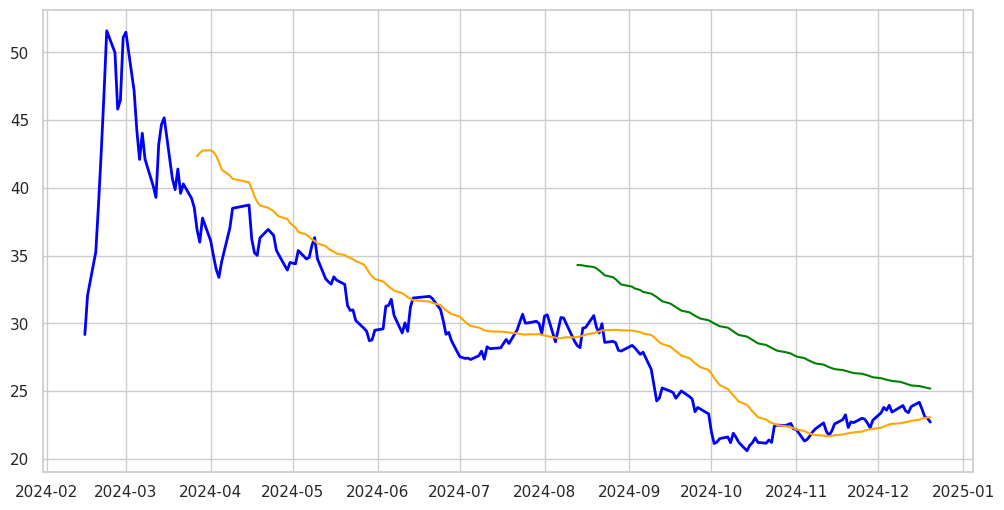

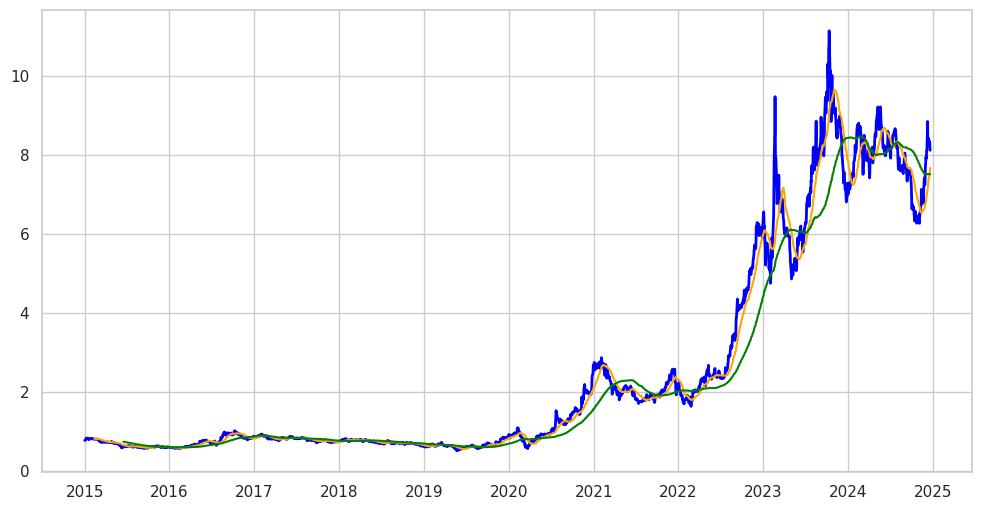

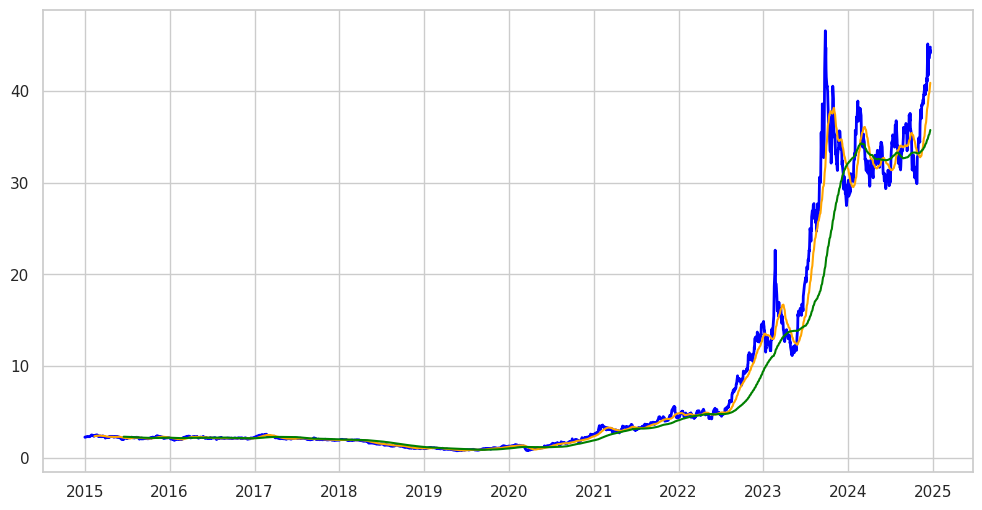

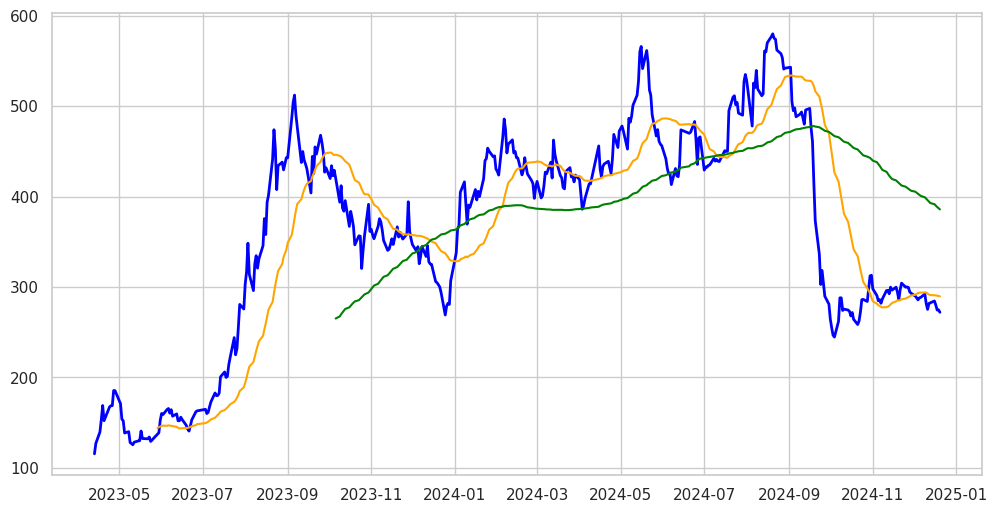

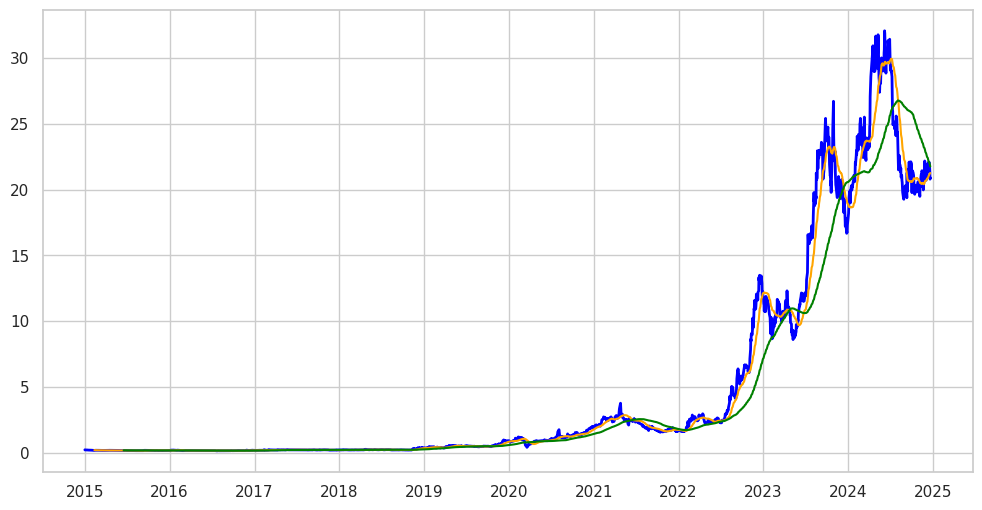

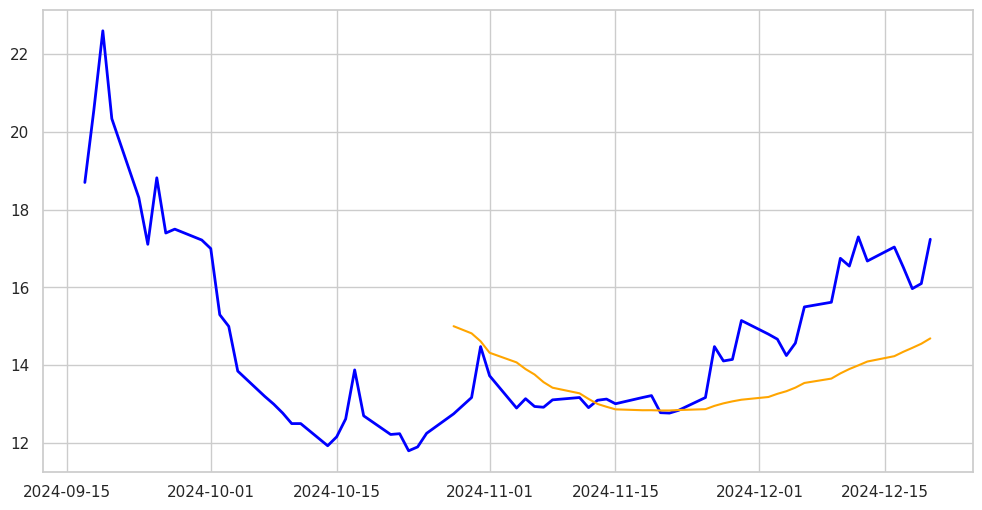

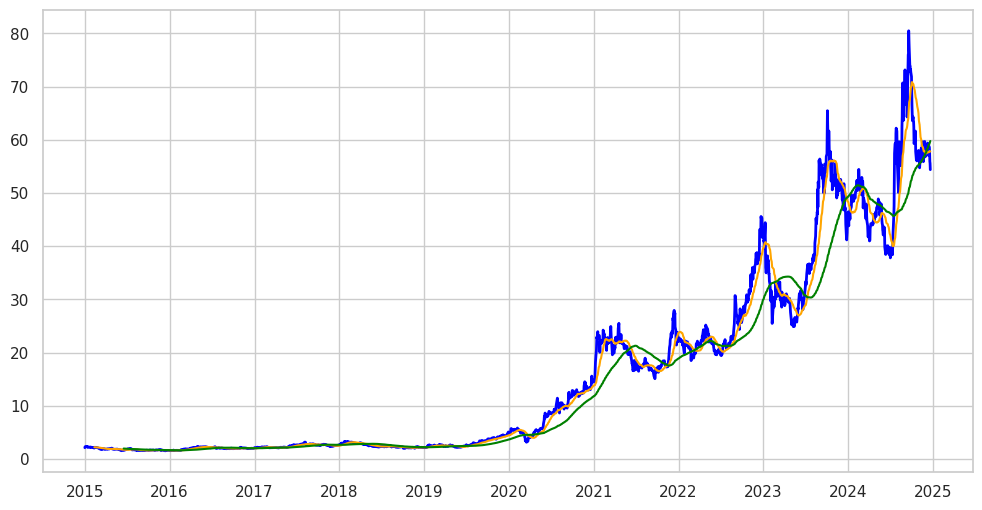

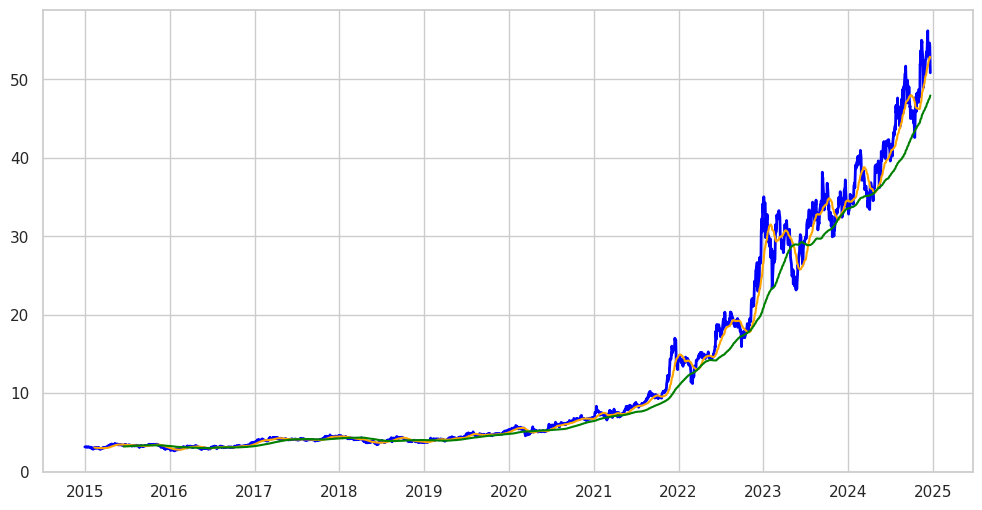

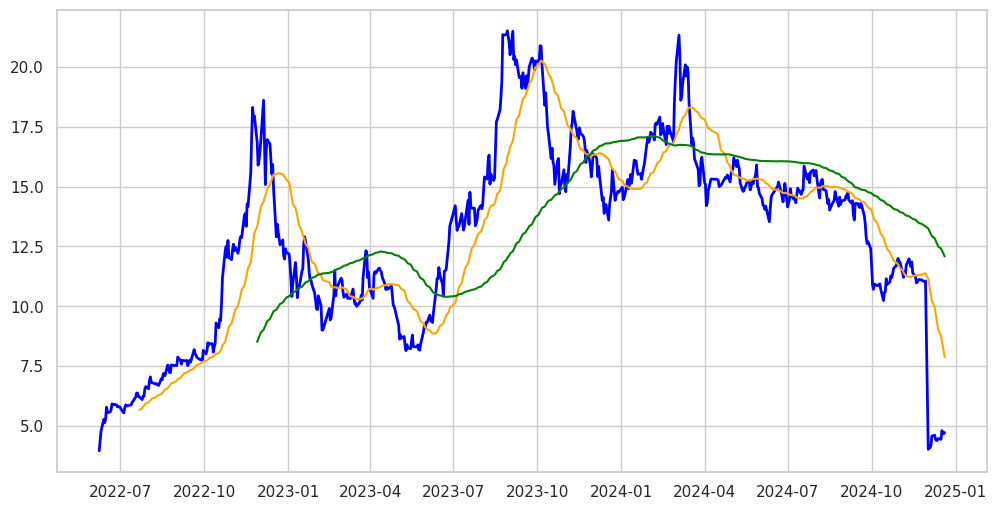

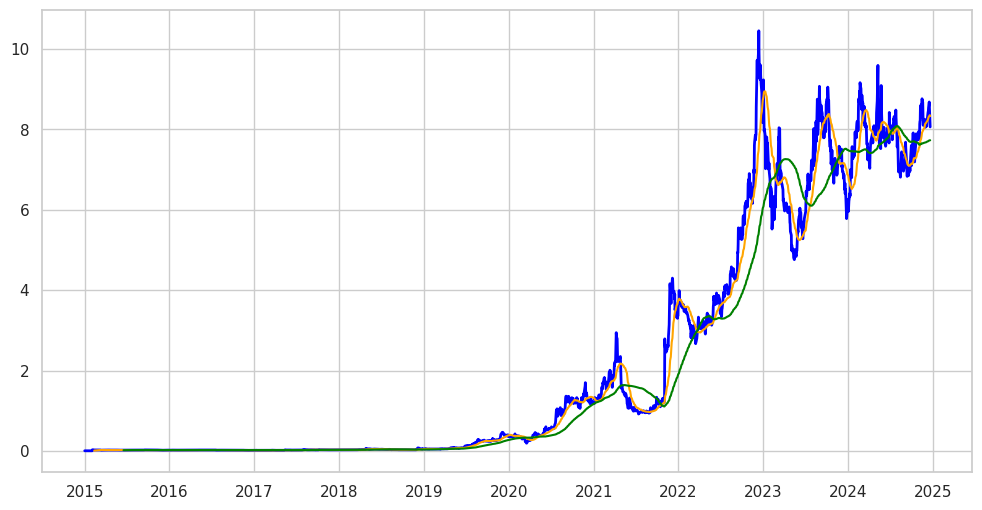

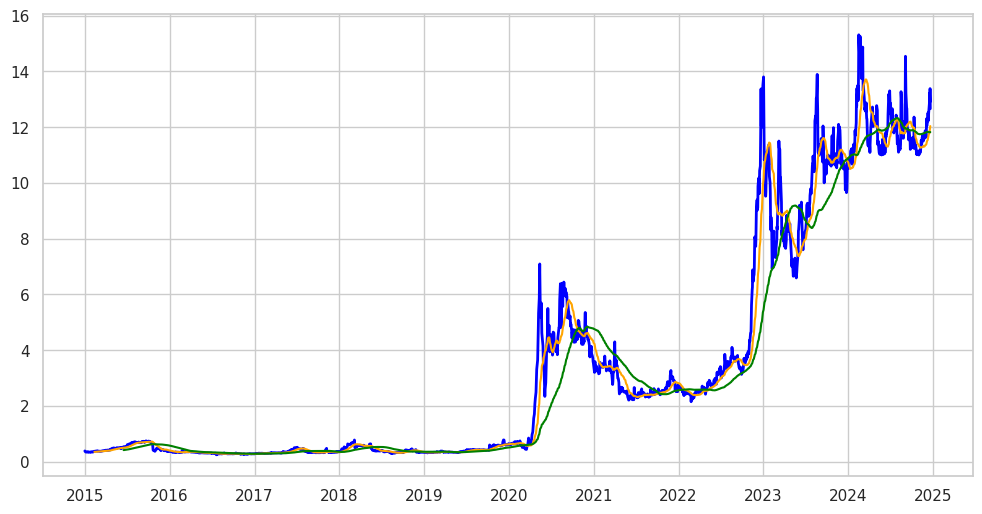

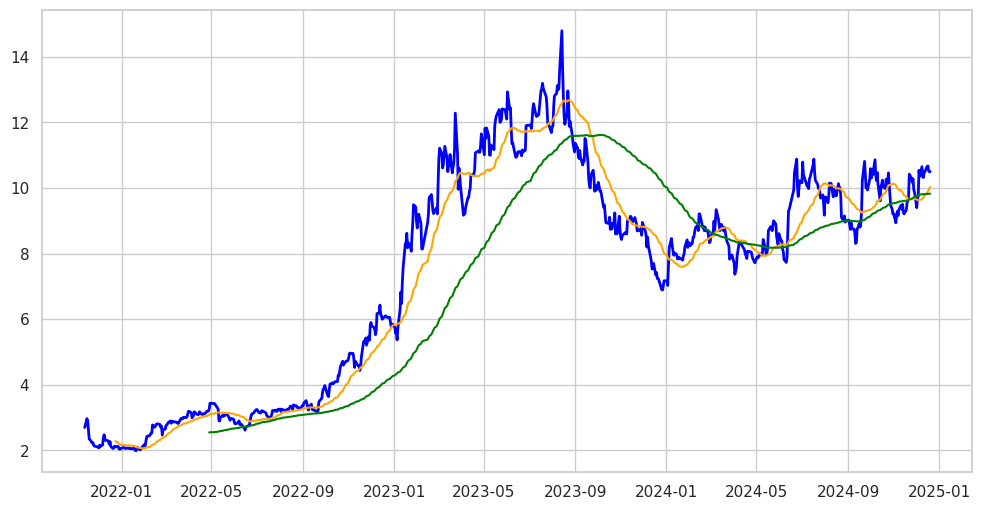

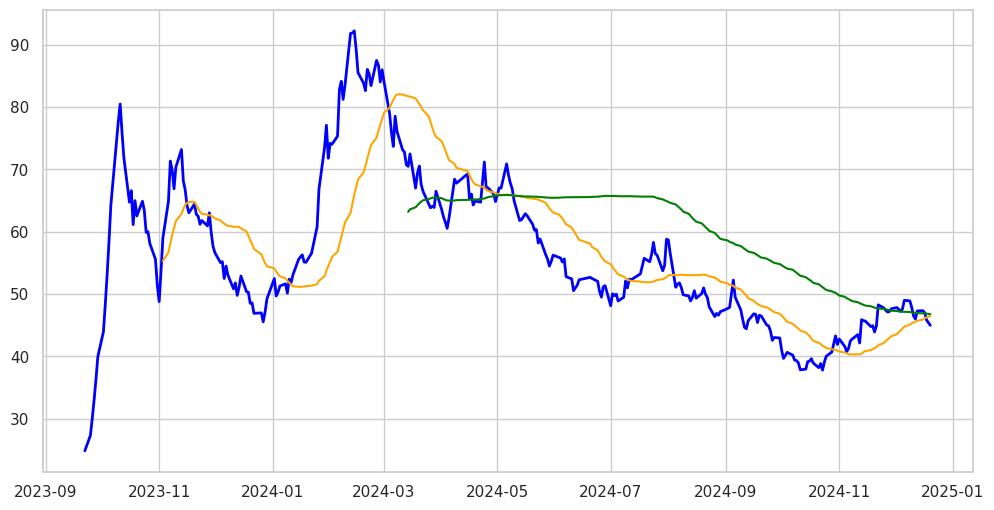

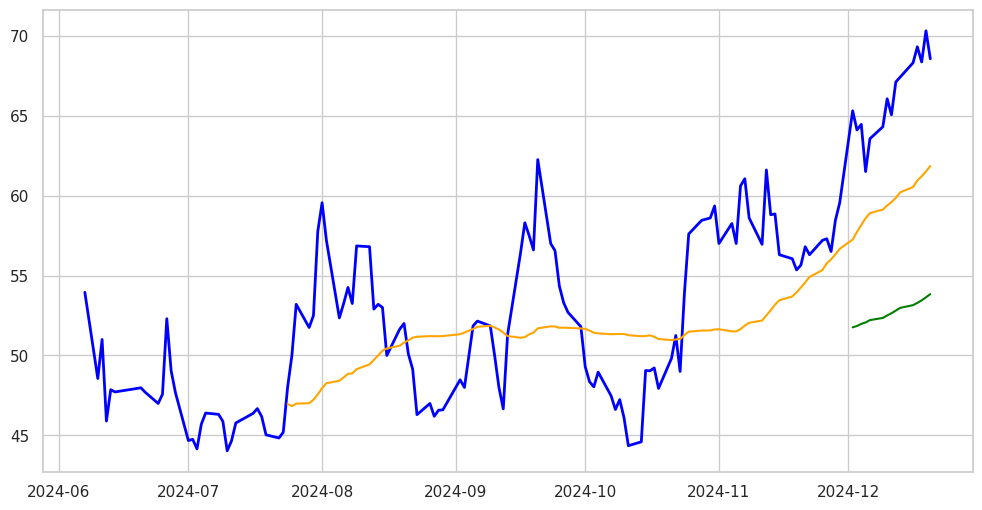

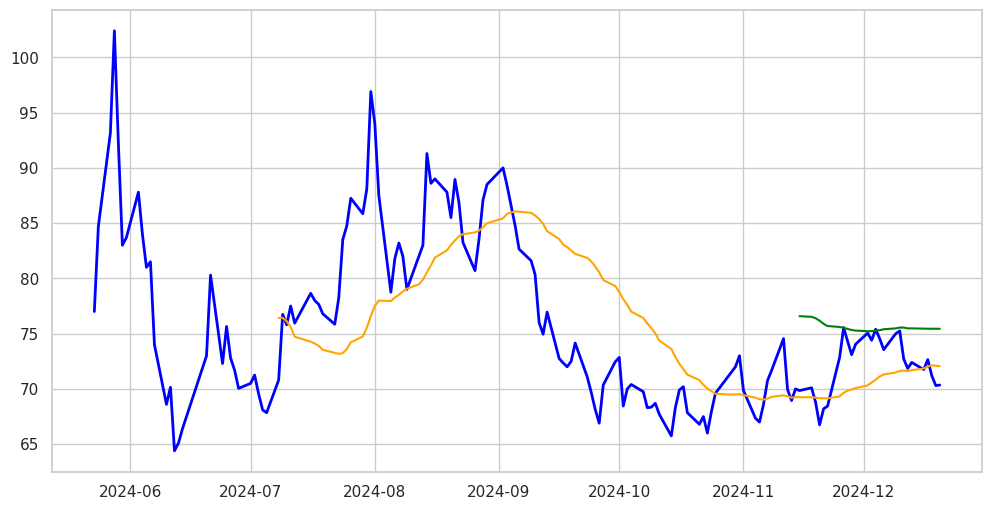

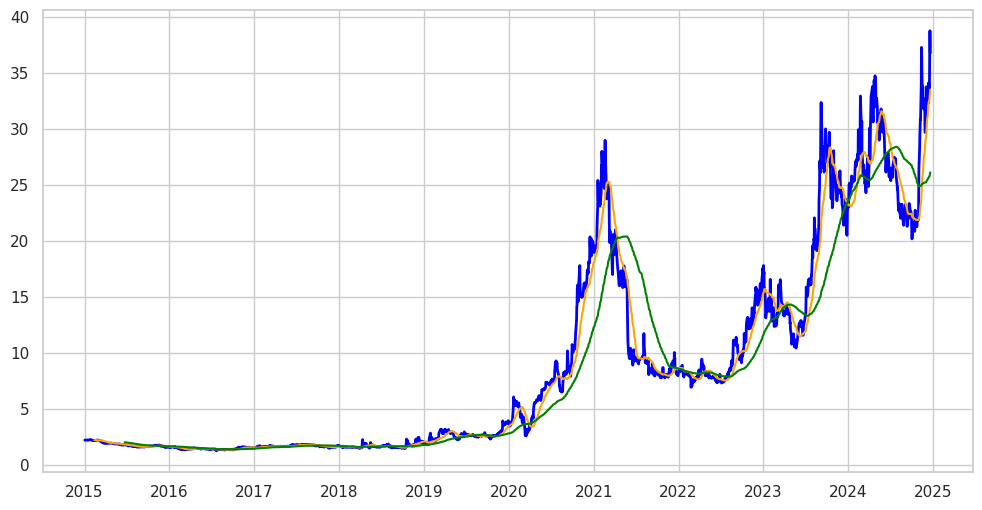

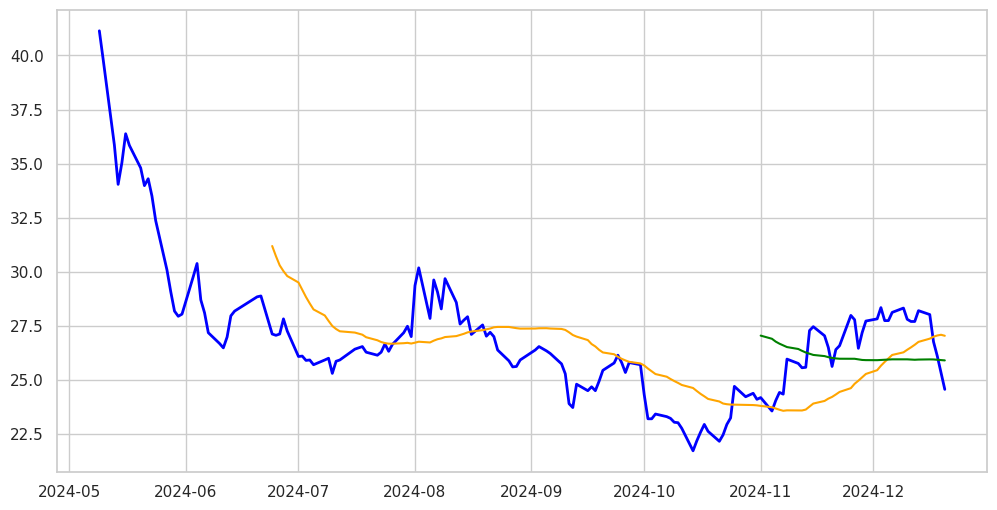

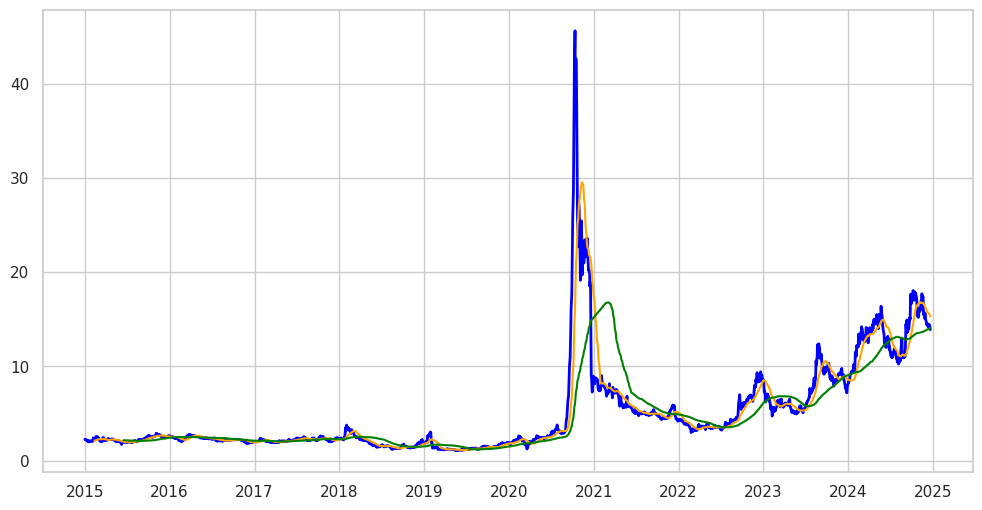

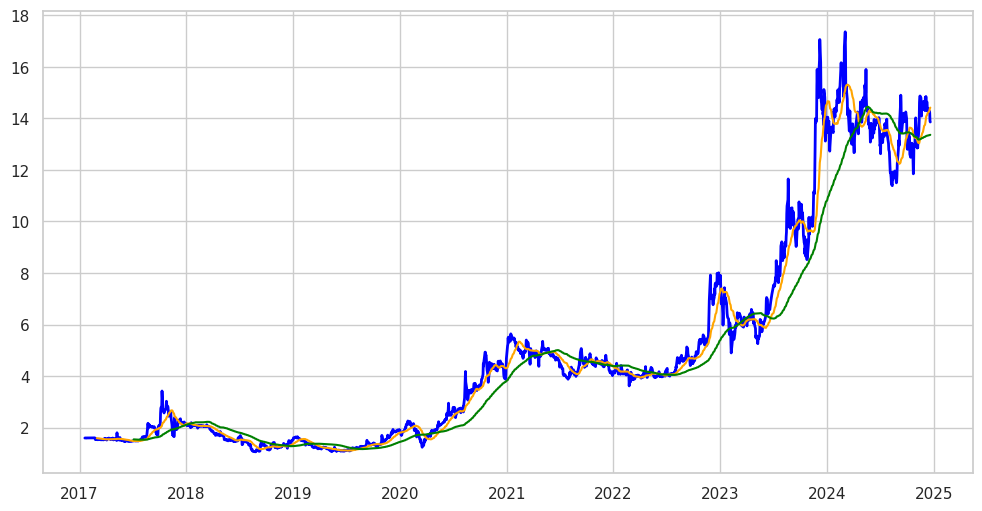

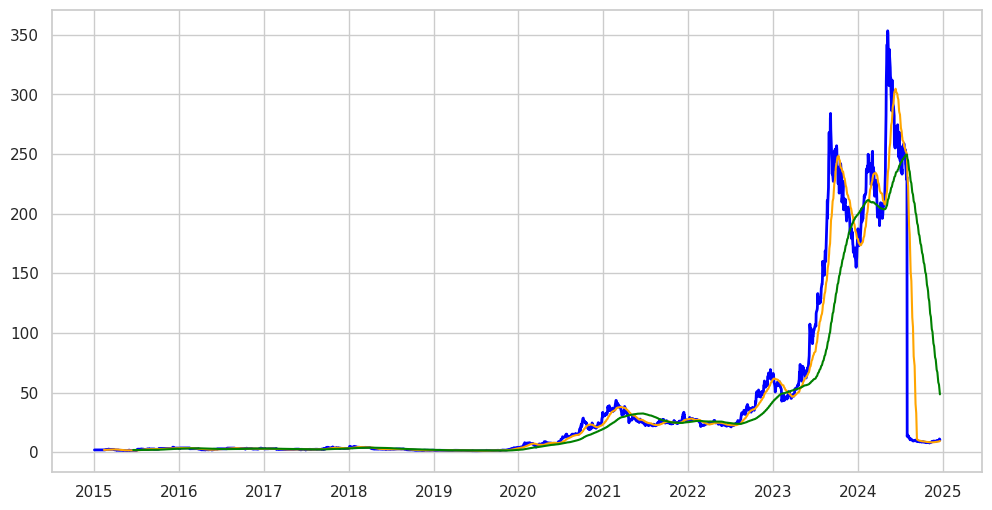

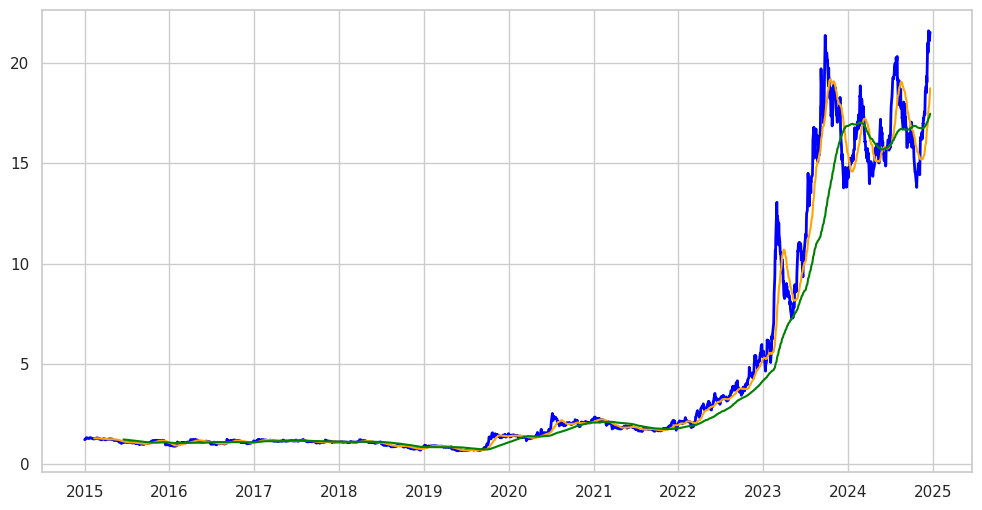

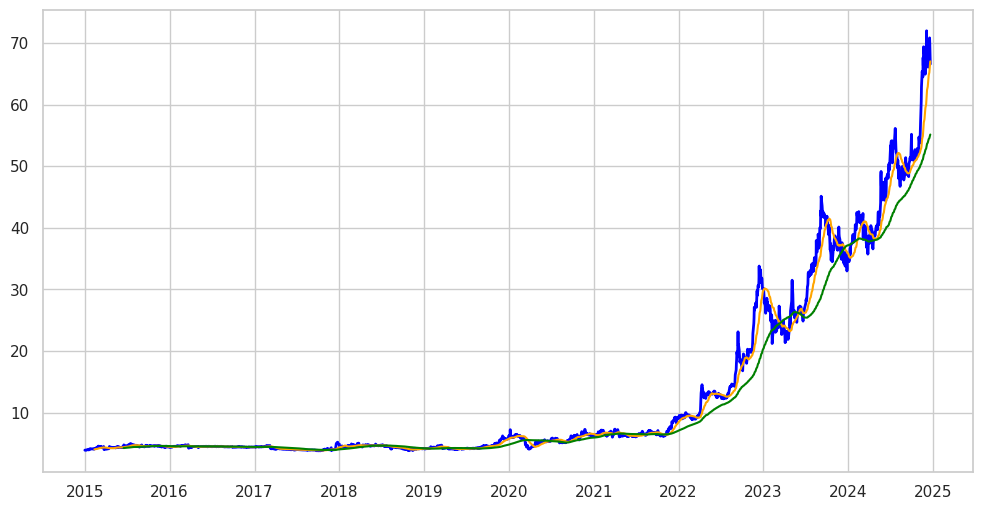

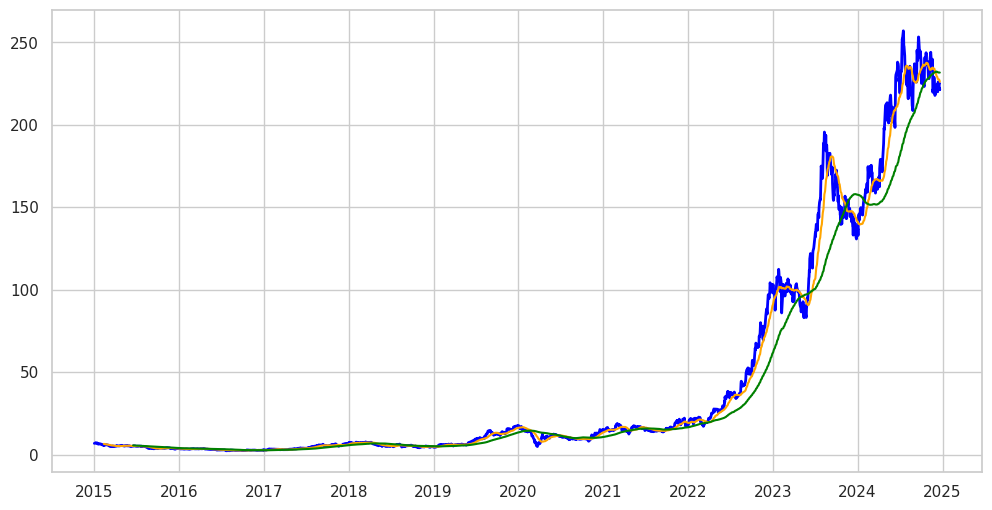

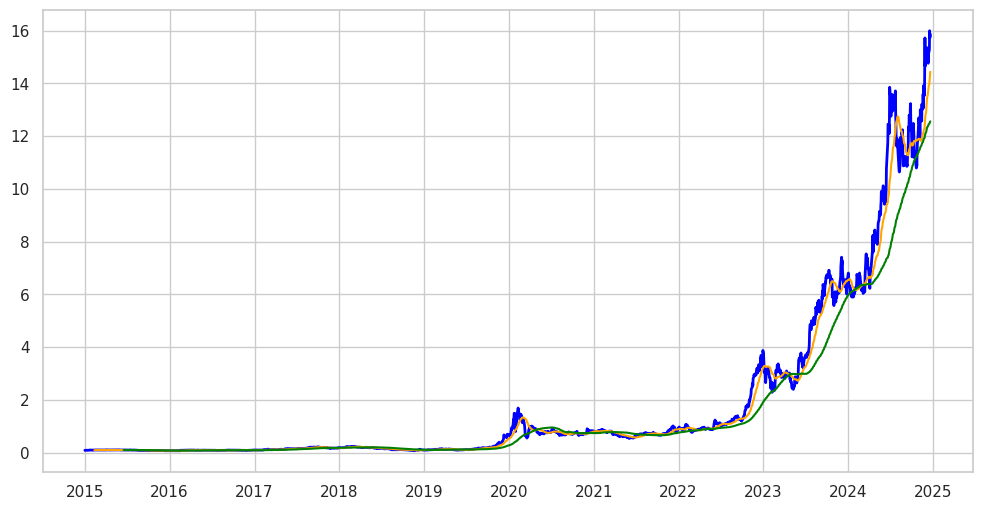

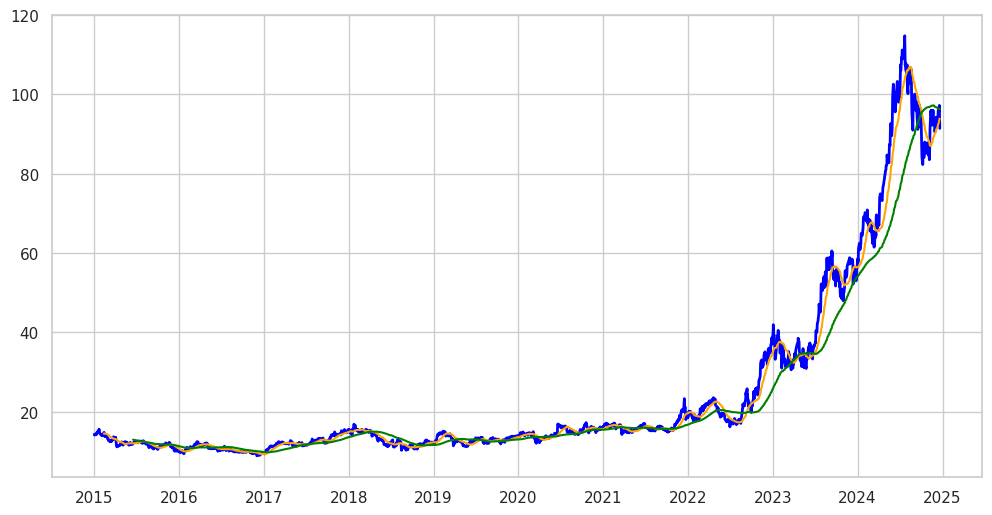

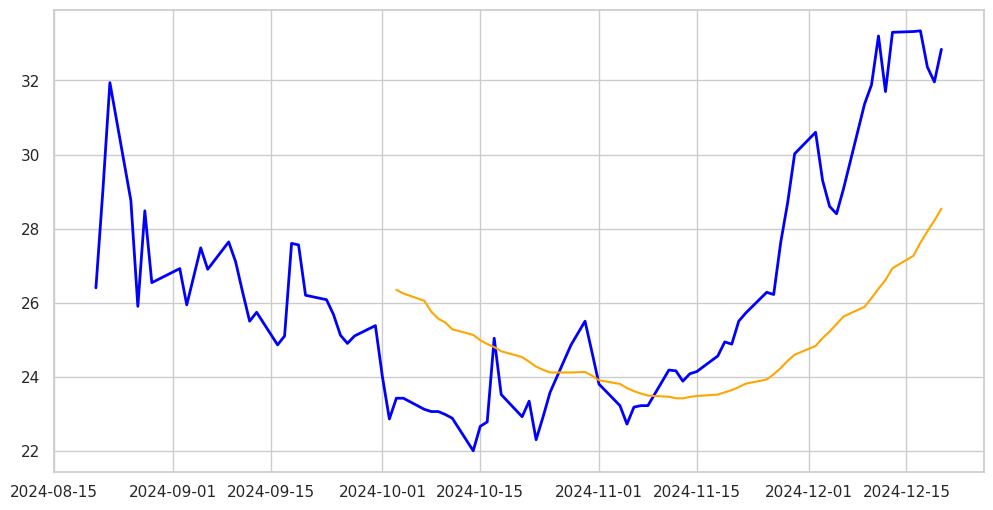

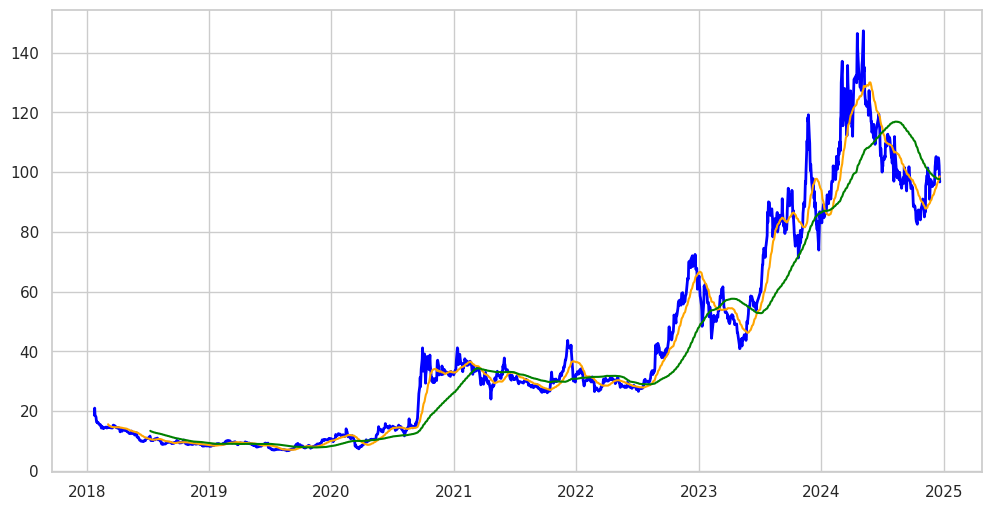

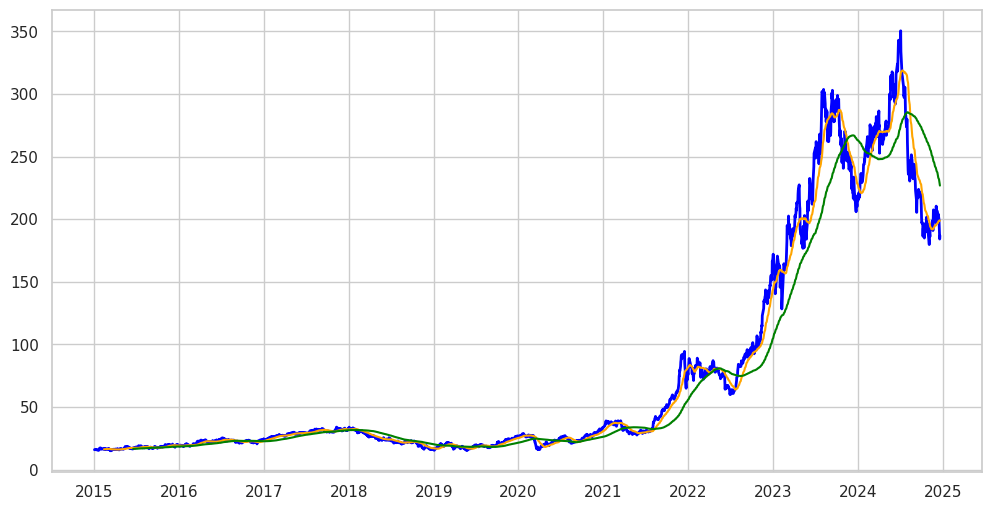

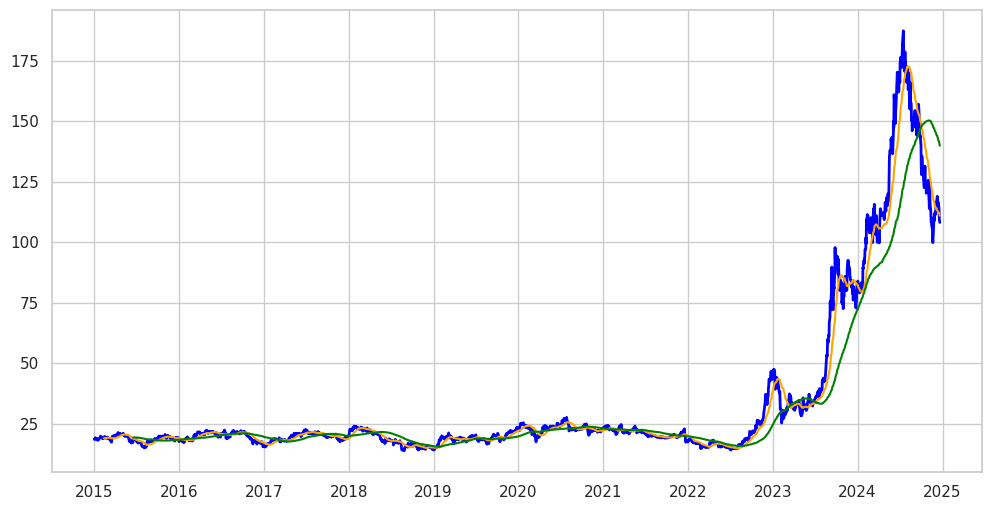

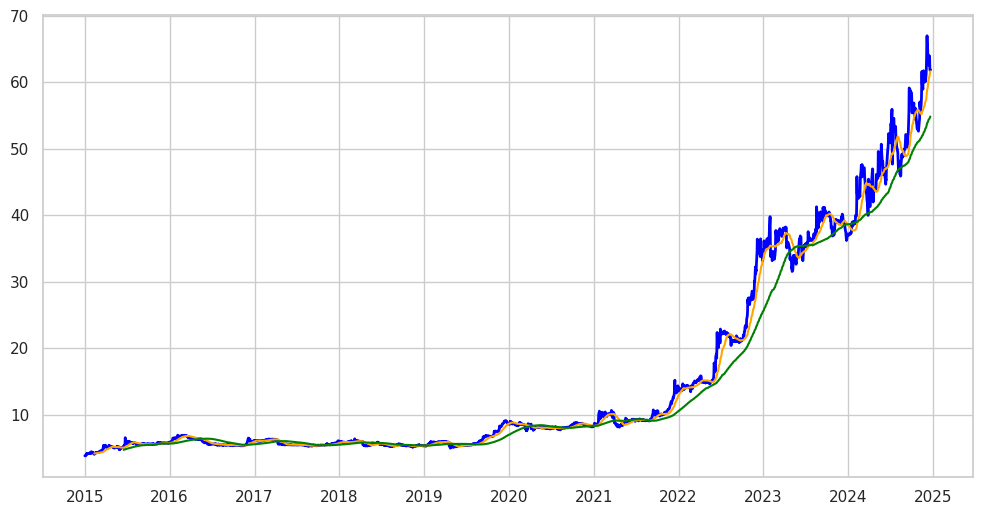

In [386]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os
from datetime import datetime
import logging

# Set up logging
logging.basicConfig(
    filename="historical_data_log.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Define paths
filtered_csv_path = r"/content/Historical_Price_Charts/filtered_companies.csv"
output_folder = r"/content/Historical_Price_Charts"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the filtered companies CSV
try:
    filtered_companies = pd.read_csv(filtered_csv_path)
    logging.info(f"Loaded filtered companies from {filtered_csv_path}")
except Exception as e:
    logging.error(f"Failed to load filtered companies: {e}")
    raise

# Define date range for historical data
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

# Function to fetch and process data for a single ticker
def fetch_and_save_data(ticker, company_name):
    try:
        # Fetch stock data
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Skip if no data is fetched
        if stock_data.empty or 'Close' not in stock_data.columns:
            logging.warning(f"No valid data found for ticker {ticker}. Skipping...")
            return

        # Calculate moving averages
        stock_data['MA30'] = stock_data['Close'].rolling(window=30).mean()
        stock_data['MA120'] = stock_data['Close'].rolling(window=120).mean()

        # Save stock data to CSV
        ticker_clean = ticker.replace(".", "_")  # Replace '.' for valid filenames
        data_path = os.path.join(output_folder, f"{ticker_clean}_historical_data.csv")
        stock_data.to_csv(data_path)
        logging.info(f"Saved data for ticker {ticker} at {data_path}")

        # Plot historical closing prices with moving averages
        plt.figure(figsize=(12, 6))
        plt.plot(stock_data['Close'], label=f"{company_name} (Close)", color='blue', linewidth=2)
        plt.plot(stock_data['MA30'], label="30-Day MA", color='orange', linewidth=1.5)
        plt.plot(stock_data['MA120'], label="120-Day MA", color='green', linewidth=1.5)
        plt.fill_between(stock_data.index, stock_data['Close'], alpha=0.1, color='blue')
        plt.title(f"Historical Prices for {company_name}", fontsize=16)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)

        # Save the plot
        plot_path = os.path.join(output_folder, f"{ticker_clean}_price_chart.png")
        plt.savefig(plot_path)
        plt.close()
        logging.info(f"Saved chart for ticker {ticker} at {plot_path}")
    except Exception as e:
        logging.error(f"Error fetching data for ticker {ticker}: {e}")

# Iterate over companies and process each
for _, row in filtered_companies.iterrows():
    company_name = row['Şirket']  # Company name
    ticker = f"{company_name}.IS"  # Append .IS for Yahoo Finance compatibility
    fetch_and_save_data(ticker, company_name)

print(f"All charts and data saved in folder: {output_folder}")
logging.info("Process completed successfully.")


In [387]:
import pandas as pd
import yfinance as yf

# Define tickers for S&P 500 and USD/TRY
sp500_ticker = "^GSPC"
usdtry_ticker = "USDTRY=X"

# Date range for historical data
start_date = "2015-01-01"
end_date = "2023-12-31"

# Fetch historical data for S&P 500 and USD/TRY
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
usdtry_data = yf.download(usdtry_ticker, start=start_date, end=end_date)

# Calculate daily returns for S&P 500 and USD/TRY
sp500_data['SP500_Returns'] = sp500_data['Close'].pct_change()
usdtry_data['USDTRY_Returns'] = usdtry_data['Close'].pct_change()

# Load filtered companies
filtered_csv_path = r"/content/Historical_Price_Charts/filtered_companies.csv"
filtered_companies = pd.read_csv(filtered_csv_path)

# Dictionary to store returns for all companies
company_returns = {}

# Calculate daily returns for each company
for company in filtered_companies['Şirket']:
    ticker = f"{company}.IS"
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if not stock_data.empty:
        stock_data['Returns'] = stock_data['Close'].pct_change()
        company_returns[company] = stock_data['Returns']
    else:
        print(f"No data found for {ticker}. Skipping.")

# Combine all returns into a single DataFrame
returns_df = pd.DataFrame(company_returns)
returns_df['SP500'] = sp500_data['SP500_Returns']
returns_df['USDTRY'] = usdtry_data['USDTRY_Returns']

# Drop rows with missing data
returns_df.dropna(inplace=True)

# Calculate correlations
correlation_sp500 = returns_df.corrwith(returns_df['SP500'])
correlation_usdtry = returns_df.corrwith(returns_df['USDTRY'])

# Create a DataFrame for correlations
correlation_df = pd.DataFrame({
    'Company': returns_df.columns[:-2],
    'Correlation with SP500': correlation_sp500[:-2],
    'Correlation with USDTRY': correlation_usdtry[:-2]
})

# Save the correlation results to a CSV
correlation_csv_path = r"/content/Historical_Price_Charts/filtered_company_corr.csv"
correlation_df.to_csv(correlation_csv_path, index=False)
print(f"Correlations saved to {correlation_csv_path}")

# Display the correlation results
print(correlation_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHSGY.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for AHSGY.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BORSK.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for BORSK.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DURKN.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for DURKN.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HOROZ.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for HOROZ.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HRKET.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for HRKET.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LILAK.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for LILAK.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TCKRC.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')


No data found for TCKRC.IS. Skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Correlations saved to /content/Historical_Price_Charts/filtered_company_corr.csv
      Company  Correlation with SP500  Correlation with USDTRY
AEFES   AEFES               -0.273325                -0.353785
AFYON   AFYON               -0.404648                 0.321420
AGYO     AGYO               -0.749150                 0.025303
AKCNS   AKCNS               -0.599848                -0.389427
AKFYE   AKFYE               -0.247922                 0.516198
ALGYO   ALGYO                0.104882                 0.904413
AVPGY   AVPGY               -0.626348                -0.879216
BERA     BERA               -0.404651                 0.310049
BNTAS   BNTAS               -0.405763                 0.060209
BUCIM   BUCIM                0.306959                 0.669055
CIMSA   CIMSA               -0.333224                 0.280130
CVKMD   CVKMD               -0.526090                 0.402437
DESA     DESA               -0.783704                -0.022406
EGGUB   EGGUB               -0.690010

<ipython-input-388-b07cd6ce99a6>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Descriptive Statistics for Correlations:
       Correlation with SP500  Correlation with USDTRY
count               33.000000                33.000000
mean                -0.365453                 0.078055
std                  0.425540                 0.407321
min                 -0.975722                -0.879216
25%                 -0.745469                -0.237187
50%                 -0.404648                 0.042249
75%                 -0.097260                 0.379697
max                  0.540093                 0.904413


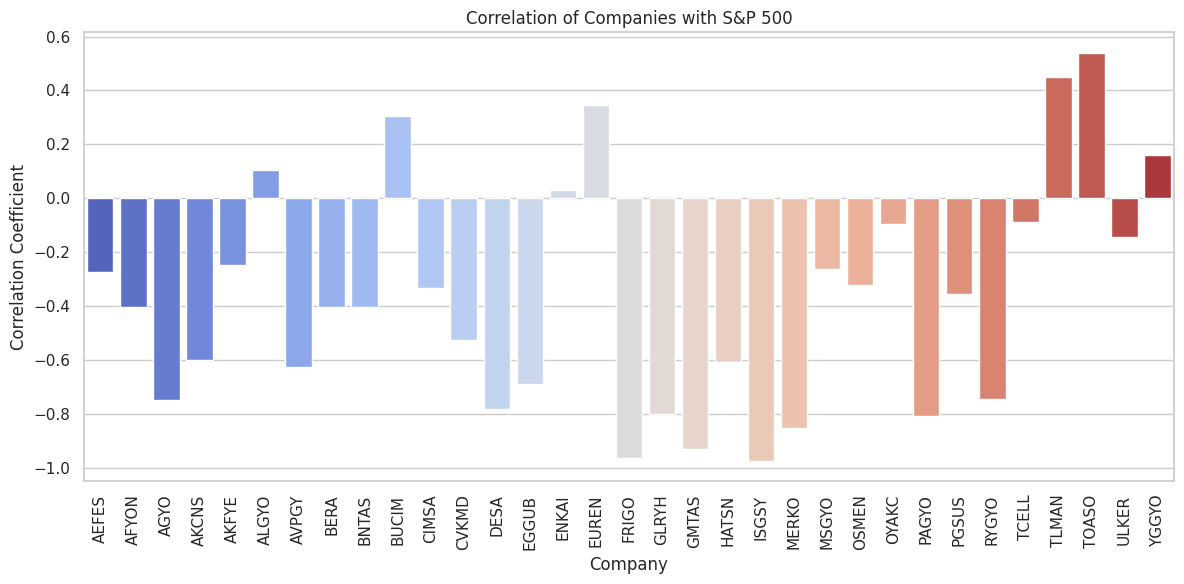

<ipython-input-388-b07cd6ce99a6>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




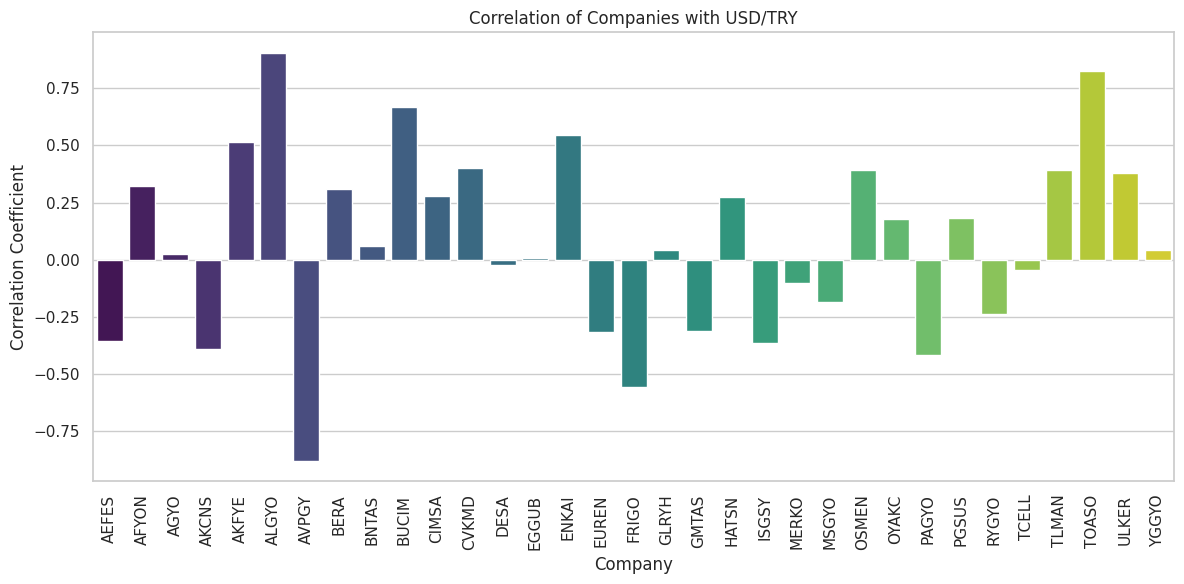

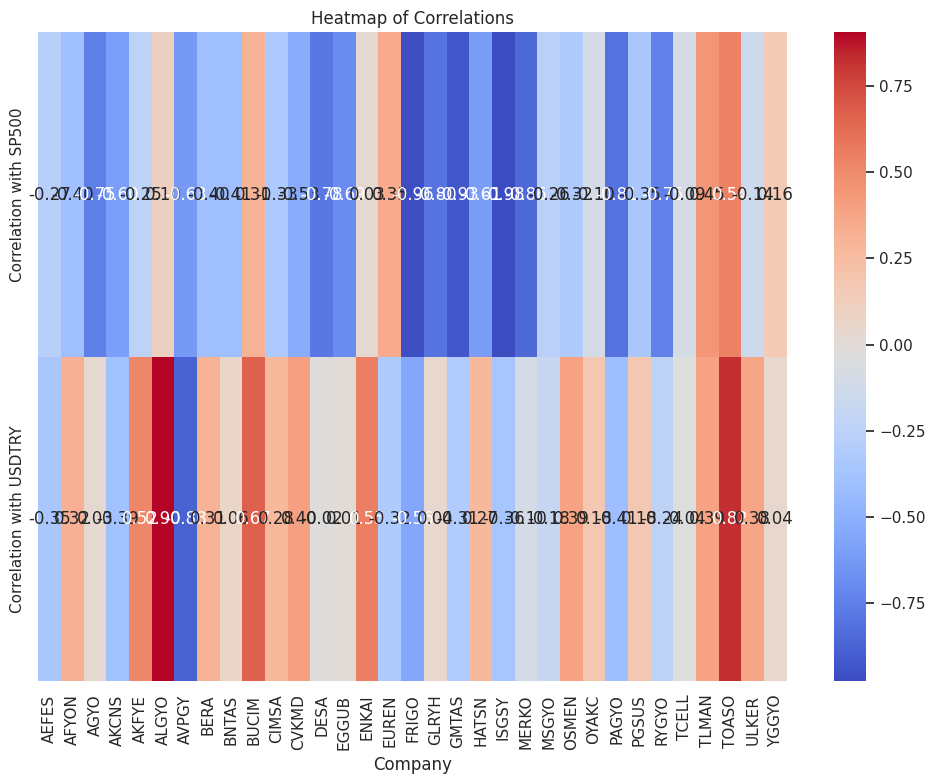

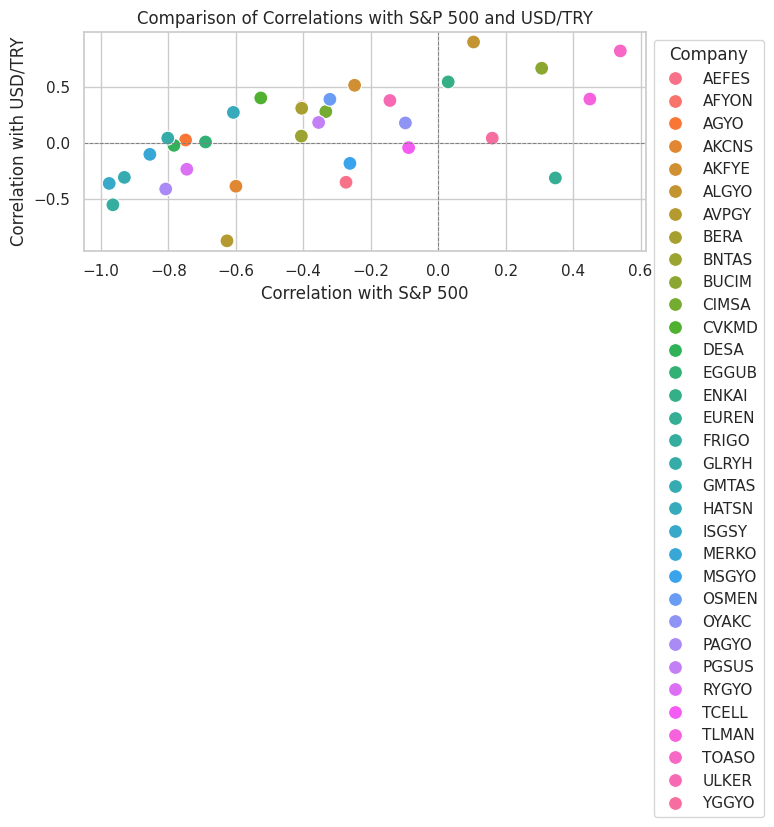

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the correlations file
correlation_csv_path = r"/content/Historical_Price_Charts/filtered_company_corr.csv"
correlation_df = pd.read_csv(correlation_csv_path)

# Descriptive Statistics
print("Descriptive Statistics for Correlations:")
print(correlation_df[['Correlation with SP500', 'Correlation with USDTRY']].describe())

# A. Bar Plot: Correlation with S&P 500
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Correlation with SP500', data=correlation_df, palette='coolwarm')
plt.title('Correlation of Companies with S&P 500')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

# B. Bar Plot: Correlation with USD/TRY
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Correlation with USDTRY', data=correlation_df, palette='viridis')
plt.title('Correlation of Companies with USD/TRY')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

# C. Heatmap: Correlations between Companies, S&P 500, and USD/TRY
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.set_index('Company').T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.tight_layout()
plt.show()

# D. Scatter Plot: Compare Correlations with S&P 500 and USD/TRY
plt.figure(figsize=(8, 6))
sns.scatterplot(data=correlation_df, x='Correlation with SP500', y='Correlation with USDTRY', hue='Company', s=100)
plt.title('Comparison of Correlations with S&P 500 and USD/TRY')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Correlation with S&P 500')
plt.ylabel('Correlation with USD/TRY')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Company')
plt.tight_layout()
plt.show()


In [389]:
import pandas as pd
import yfinance as yf
import os
from datetime import datetime, timedelta
import logging

# Initialize logging
logging.basicConfig(
    filename="historical_data_process.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Global Parameters
start_date = "2015-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')
lookback = 30  # Lookback period in days
interval = "1d"  # Daily data interval
data_directory = "./stock_data"  # Folder to save data

# Ensure the data directory exists
os.makedirs(data_directory, exist_ok=True)


# Function to Load and Preprocess Data
def load_and_preprocess_data(filtered_companies):
    """
    Fetch historical stock data with a lookback period and preprocess it.

    Args:
        filtered_companies (pd.DataFrame): DataFrame containing company tickers in 'Şirket' column.

    Returns:
        dict: A dictionary of preprocessed DataFrames for each ticker.
    """
    data = {}
    logger = logging.getLogger(__name__)

    for company in filtered_companies['Şirket']:
        ticker = f"{company}.IS"  # Format for Yahoo Finance
        try:
            logger.info(f"Fetching data for {ticker}...")

            # Fetch main historical data
            df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
            if df.empty:
                logger.warning(f"No data found for {ticker}. Skipping...")
                continue

            # Ensure the lookback period
            earliest_date = df.index[0]
            lookback_start_date = (earliest_date - timedelta(days=lookback)).strftime('%Y-%m-%d')
            lookback_df = yf.download(ticker, start=lookback_start_date, end=earliest_date, interval=interval)

            # Combine lookback data with main data
            df = pd.concat([lookback_df, df]).drop_duplicates()

            # Data Preprocessing
            df.dropna(inplace=True)
            df.reset_index(inplace=True)  # Add 'Date' as a column
            df['Ticker'] = ticker  # Add ticker for identification
            df = df.round(5)  # Round numeric values to avoid precision issues

            # Save individual ticker data
            file_name = os.path.join(data_directory, f"{ticker}_data.csv")
            df.to_csv(file_name, index=False)
            logger.info(f"Saved processed data for {ticker} to {file_name}.")

            # Add to dictionary
            data[ticker] = df

        except Exception as e:
            logger.error(f"Error processing data for {ticker}: {e}")

    return data


# Function to Verify and Clean Data
def verify_data(data):
    """
    Verifies, cleans, and standardizes the downloaded data files.

    Args:
        data (dict): Dictionary containing preprocessed DataFrames for each ticker.
    """
    logger = logging.getLogger(__name__)

    # Verify each ticker's data
    for ticker, df in data.items():
        logger.info(f"Verifying data for {ticker}:")
        logger.info(f"Head of Data:\n{df.head()}\n")

    # Check files in the directory
    for file in os.listdir(data_directory):
        if file.endswith("_data.csv"):
            file_path = os.path.join(data_directory, file)
            df = pd.read_csv(file_path)
            logger.info(f"Verifying file: {file}")

            # Rename 'Price' to 'Date' if needed
            if 'Date' not in df.columns and 'Price' in df.columns:
                df.rename(columns={'Price': 'Date'}, inplace=True)
                logger.info(f"Renamed 'Price' column to 'Date' in {file}.")

            # Remove rows with NaN in 'Adj Close'
            if 'Adj Close' in df.columns:
                initial_rows = df.shape[0]
                df.dropna(subset=['Adj Close'], inplace=True)
                logger.info(f"Removed {initial_rows - df.shape[0]} rows with NaN 'Adj Close'.")

            # Remove first row and add 'Ticker' column
            if len(df) > 1:
                df.drop(index=0, inplace=True)
            ticker = file.split("_data.csv")[0]
            df['Ticker'] = ticker

            # Save cleaned data
            df.to_csv(file_path, index=False)
            logger.info(f"Cleaned and updated file saved: {file_path}")


# Directory to save stock data
stock_data_directory = "/content/Historical_Price_Charts"

# Ensure the directory exists
if not os.path.exists(stock_data_directory):
    os.makedirs(stock_data_directory)

# Define date range
start_date = "2020-01-01"
end_date = "2023-12-31"


# Load filtered companies
try:
    filtered_csv_path = "/content/Historical_Price_Charts/filtered_companies.csv"
    filtered_companies = pd.read_csv(filtered_csv_path)
    logging.info(f"Loaded filtered companies from {filtered_csv_path}.")
except Exception as e:
    logging.error(f"Failed to load filtered companies CSV: {e}")
    raise

# Execute the process
data = load_and_preprocess_data(filtered_companies)
verify_data(data)

print(f"Data preprocessing and verification complete. Files saved in: {data_directory}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHSGY.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1577826000, endDate = 1703970000")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 

Data preprocessing and verification complete. Files saved in: ./stock_data


In [390]:
import os
import pandas as pd

# Directory containing saved stock data
stock_data_directory = "/content/stock_data"

# Load the list of filtered companies
filtered_csv_path = "/content/Historical_Price_Charts/filtered_companies.csv"
filtered_companies = pd.read_csv(filtered_csv_path)

# Initialize a dictionary to store returns
company_returns = {}

# Load stock data for each company and calculate daily returns
for company in filtered_companies['Şirket']:
    ticker = f"{company}.IS"
    file_path = os.path.join(stock_data_directory, f"{ticker}_data.csv")

    if os.path.exists(file_path):
        # Load the stock data
        stock_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

        # Calculate daily returns
        stock_data['Returns'] = stock_data['Close'].pct_change()

        # Store the returns in the dictionary
        company_returns[company] = stock_data['Returns']
    else:
        print(f"Data file for {ticker} not found. Skipping...")

# Combine all returns into a single DataFrame
returns_df = pd.DataFrame(company_returns)

# Drop rows with missing values
returns_df.dropna(inplace=True)

# Display a preview of the returns DataFrame
print("Preview of Returns DataFrame:")
print(returns_df.head())


Data file for AHSGY.IS not found. Skipping...
Data file for BORSK.IS not found. Skipping...
Data file for DURKN.IS not found. Skipping...
Data file for HOROZ.IS not found. Skipping...
Data file for HRKET.IS not found. Skipping...
Data file for LILAK.IS not found. Skipping...
Data file for TCKRC.IS not found. Skipping...
Preview of Returns DataFrame:
               AEFES     AFYON      AGYO     AKCNS     AKFYE     ALGYO  \
Date                                                                     
2023-12-22  0.060726 -0.035336 -0.007821  0.004542 -0.055968 -0.022043   
2023-12-26  0.001541  0.011650 -0.032037 -0.018086  0.031032  0.044664   
2023-12-27 -0.016154  0.010557 -0.086288 -0.001535  0.013544 -0.011660   
2023-12-28  0.047694  0.024691  0.009056  0.065334  0.024499  0.012921   
2023-12-29  0.026119  0.028730  0.085897  0.026695  0.039855  0.023295   

               AVPGY      BERA     BNTAS     BUCIM  ...     OSMEN     OYAKC  \
Date                                              

In [391]:
import pandas as pd
import yfinance as yf

# Define rolling window size (e.g., 20 days)
rolling_window = 20

# Initialize an empty list to store factors
factors_list = []

# Fetch S&P 500 data for beta calculation
sp500_data = yf.download("^GSPC", start="2015-01-01", end="2023-12-31")
sp500_data['SP500_Returns'] = sp500_data['Close'].pct_change()

# Load filtered companies
filtered_csv_path = r"/content/Historical_Price_Charts/filtered_companies.csv"
filtered_companies = pd.read_csv(filtered_csv_path)

# Loop through each company
for company in filtered_companies['Şirket']:
    ticker = f"{company}.IS"
    stock_data = yf.download(ticker, start="2015-01-01", end="2023-12-31")

    if not stock_data.empty:
        stock_data['Date'] = stock_data.index  # Add Date column
        stock_data['Returns'] = stock_data['Close'].pct_change()  # Calculate daily returns

        # Calculate rolling factors
        stock_data['Volatility'] = stock_data['Returns'].rolling(rolling_window).std()
        stock_data['Momentum'] = (1 + stock_data['Returns']).rolling(rolling_window).apply(lambda x: x.prod() - 1, raw=True)
        stock_data['Beta'] = stock_data['Returns'].rolling(rolling_window).corr(sp500_data['SP500_Returns'])

        # Add Company column and select relevant columns
        stock_data['Company'] = company
        factors_list.append(stock_data[['Date', 'Company', 'Volatility', 'Momentum', 'Beta']])

# Concatenate all the factors into a single DataFrame
factors_df = pd.concat(factors_list, ignore_index=True)

# Save factors to CSV
factors_csv_path = r"/content/Historical_Price_Charts/factors_simplified.csv"
factors_df.to_csv(factors_csv_path, index=False)
print(f"Factors saved to {factors_csv_path}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHSGY.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1420063200, endDate = 1703970000")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 

Factors saved to /content/Historical_Price_Charts/factors_simplified.csv


In [397]:
import pandas as pd

# Load the filtered companies file
filtered_csv_path = r"/content/Historical_Price_Charts/filtered_companies.csv"  # Adjust path if needed
filtered_companies = pd.read_csv(filtered_csv_path)

# Extract unique company/asset names and add .IS suffix
asset_names = [f"{name}.IS" for name in filtered_companies['Şirket'].unique()]  # Replace 'Şirket' if column name differs

# Format the asset names into a Python list
formatted_assets = f'assets = {asset_names}'

# Print the formatted list
print(formatted_assets)



assets = ['AEFES.IS', 'AFYON.IS', 'AGYO.IS', 'AHSGY.IS', 'AKCNS.IS', 'AKFYE.IS', 'ALGYO.IS', 'AVPGY.IS', 'BERA.IS', 'BNTAS.IS', 'BORSK.IS', 'BUCIM.IS', 'CIMSA.IS', 'CVKMD.IS', 'DESA.IS', 'DURKN.IS', 'EGGUB.IS', 'ENKAI.IS', 'EUREN.IS', 'FRIGO.IS', 'GLRYH.IS', 'GMTAS.IS', 'HATSN.IS', 'HOROZ.IS', 'HRKET.IS', 'ISGSY.IS', 'LILAK.IS', 'MERKO.IS', 'MSGYO.IS', 'OSMEN.IS', 'OYAKC.IS', 'PAGYO.IS', 'PGSUS.IS', 'RYGYO.IS', 'TCELL.IS', 'TCKRC.IS', 'TLMAN.IS', 'TOASO.IS', 'ULKER.IS', 'YGGYO.IS']


# Optimal Portfolio

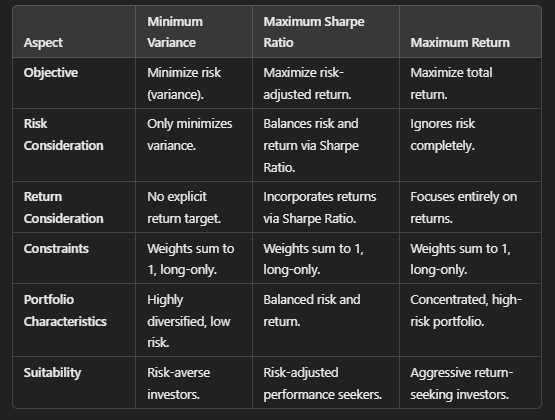

####Diagnostics ( RERUN IF THERE IS AN ERROR)

In [398]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import cvxpy as cp
from cvxopt import matrix, solvers
# List of Turkish assets (BIST stocks) COPY FROM PREVIOUS SNIPPET
assets = asset_names

# Risk-free rate in Turkish market (e.g., T-bill rate, use realistic TRY value)
risk_free_rate = 0.35  # 20% annualized (example: adjust based on T-bills)

# Download historical adjusted close prices
hist_data = {}
for asset in assets:
    try:
        data = yf.download(asset, start='2020-01-01', end='2024-06-01')
        hist_data[asset] = data['Adj Close']
    except Exception as e:
        print(f"Error downloading {asset}: {e}")

# Fix the concatenation process
hist_data = pd.concat(hist_data, axis=1)
hist_data.columns = [col[1] if isinstance(col, tuple) else col for col in hist_data.columns]
hist_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AHSGY.IS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-06-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577826000, endDate = 1717189200")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 

AEFES.IS   AFYON.IS   AGYO.IS  AHSGY.IS    AKCNS.IS   AKFYE.IS  \
Date                                                                           
2020-01-02   17.703104   2.158019  1.777248       NaN    9.048207        NaN   
2020-01-03   17.595812   2.076456  1.667316       NaN    8.445592        NaN   
2020-01-06   17.212627   1.943916  1.529899       NaN    8.166772        NaN   
2020-01-07   17.978996   2.107042  1.594027       NaN    8.580506        NaN   
2020-01-08   17.641796   2.083253  1.566544       NaN    8.373639        NaN   
...                ...        ...       ...       ...         ...        ...   
2024-05-27  205.550003  13.000298  8.411528       NaN  142.000000  27.059999   
2024-05-28  206.399994  12.864474  8.470695       NaN  140.199997  27.139999   
2024-05-29  199.699997  12.748054  8.579166       NaN  140.399994  25.900000   
2024-05-30  195.199997  13.058509  8.746805       NaN  143.100006  26.200001   
2024-05-31  199.000000  13.010000  8.539722       NaN  142.500000  27.000000   

             ALGYO.IS   AVPGY.IS    BERA.IS   BNTAS.IS  ...   OYAKC.IS  \
Date                                                    ...              
2020-01-02   2.717932        NaN   1.900633   1.439004  ...   1.500000   
2020-01-03   2.516383        NaN   1.816491   1.327453  ...   1.428205   
2020-01-06   2.848345        NaN   1.677903   1.238212  ...   1.369230   
2020-01-07   2.880948        NaN   1.747197   1.316298  ...   1.371794   
2020-01-08   2.756462        NaN   1.707600   1.277255  ...   1.356410   
...               ...        ...        ...        ...  ...        ...   
2024-05-27  21.698679  41.206108  19.320000  12.350000  ...  16.525640   
2024-05-28  21.429316  41.962002  18.700001  11.860000  ...  16.179487   
2024-05-29  21.149977  42.040806  17.910000  12.080000  ...  15.897436   
2024-05-30  20.970402  42.060505  18.110001  11.600000  ...  16.064102   
2024-05-31  21.139999  41.370991  17.650000  11.540000  ...  15.551282   

             PAGYO.IS    PGSUS.IS   RYGYO.IS   TCELL.IS  TCKRC.IS    TLMAN.IS  \
Date                                                                            
2020-01-02   4.356612   17.575089   0.688520  11.696466       NaN    9.478801   
2020-01-03   4.412917   16.971521   0.661752  11.546512       NaN    8.972909   
2020-01-06   4.251040   16.327032   0.624575  11.404887       NaN    8.715527   
2020-01-07   5.088580   16.265654   0.629037  11.579834       NaN    8.955159   
2020-01-08   4.244002   15.754154   0.605243  11.538181       NaN    8.848657   
...               ...         ...        ...        ...       ...         ...   
2024-05-27  42.854877  210.500000   9.645000  86.884705       NaN  120.699997   
2024-05-28  42.701756  209.899994   9.570000  87.999855       NaN  119.500000   
2024-05-29  43.543922  204.600006   9.605000  88.824097       NaN  116.800003   
2024-05-30  42.606056  206.300003  10.000000  92.848335       NaN  117.000000   
2024-05-31  45.362244  201.800003  10.115000  96.581657       NaN  113.400002   

              TOASO.IS    ULKER.IS   YGGYO.IS  
Date                                           
2020-01-02   17.478039   21.853039   6.224741  
2020-01-03   17.256134   21.454674   6.205424  
2020-01-06   17.073391   20.961462   6.234399  
2020-01-07   17.347506   21.606432   6.538634  
2020-01-08   17.504143   22.099642   6.398590  
...                ...         ...        ...  
2024-05-27  305.000000  139.000000  45.520786  
2024-05-28  317.750000  141.800003  45.331905  
2024-05-29  317.000000  143.399994  45.445232  
2024-05-30  316.750000  138.300003  44.935253  
2024-05-31  308.750000  136.500000  43.537514  

[1106 rows x 40 columns]

In [399]:
# Define a threshold for missing data (e.g., 20%)
missing_threshold = 0.2  # Allow up to 20% missing data per asset

# Calculate the proportion of missing data for each asset
missing_proportions = hist_data.isnull().mean()

# Keep assets with missing data below the threshold
valid_assets = missing_proportions[missing_proportions <= missing_threshold].index
hist_data = hist_data[valid_assets]

# Fill remaining missing data (forward-fill and backward-fill)
hist_data = hist_data.fillna(method='ffill').fillna(method='bfill')

# Debugging: Check final assets and missing values
print(f"Assets after cleaning: {len(hist_data.columns)}")
print(hist_data.columns.tolist())


# Calculate historical daily log returns
hist_return = hist_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = hist_return.mean() * 252  # Annualize returns
cov_matrix = hist_return.cov() * 252     # Annualize covariance

Assets after cleaning: 27
['AEFES.IS', 'AFYON.IS', 'AGYO.IS', 'AKCNS.IS', 'ALGYO.IS', 'BERA.IS', 'BNTAS.IS', 'BUCIM.IS', 'CIMSA.IS', 'DESA.IS', 'EGGUB.IS', 'ENKAI.IS', 'FRIGO.IS', 'GLRYH.IS', 'ISGSY.IS', 'MERKO.IS', 'MSGYO.IS', 'OSMEN.IS', 'OYAKC.IS', 'PAGYO.IS', 'PGSUS.IS', 'RYGYO.IS', 'TCELL.IS', 'TLMAN.IS', 'TOASO.IS', 'ULKER.IS', 'YGGYO.IS']


<ipython-input-399-543546301ea2>:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



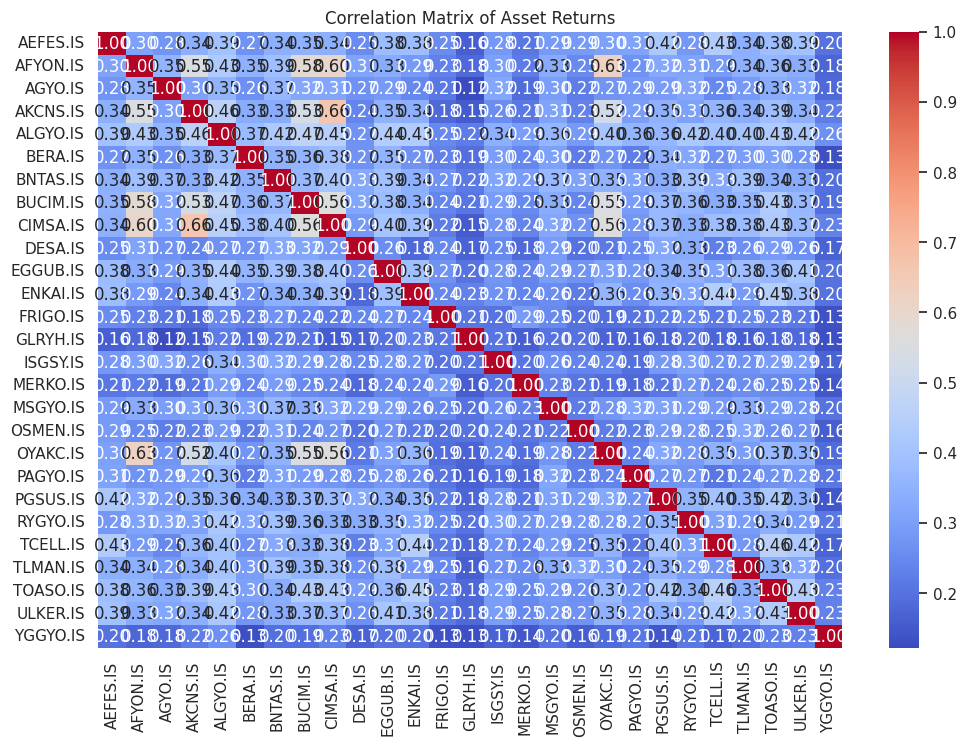

Historical Mean Returns:
    AEFES.IS  AFYON.IS   AGYO.IS  AKCNS.IS  ALGYO.IS   BERA.IS  BNTAS.IS  \
mu   0.00219  0.001626  0.001421  0.002495  0.001856  0.002017  0.001884   

    BUCIM.IS  CIMSA.IS   DESA.IS  ...  OSMEN.IS  OYAKC.IS  PAGYO.IS  PGSUS.IS  \
mu  0.001988  0.002946  0.003143  ...   0.00389  0.002116   0.00212  0.002209   

    RYGYO.IS  TCELL.IS  TLMAN.IS  TOASO.IS  ULKER.IS  YGGYO.IS  
mu  0.002432   0.00191  0.002246  0.002599  0.001658   0.00176  

[1 rows x 27 columns]

Covariance Matrix:
          AEFES.IS  AFYON.IS   AGYO.IS  AKCNS.IS  ALGYO.IS   BERA.IS  \
AEFES.IS  0.000669  0.000257  0.000279  0.000289  0.000304  0.000280   
AFYON.IS  0.000257  0.001058  0.000448  0.000577  0.000417  0.000458   
AGYO.IS   0.000279  0.000448  0.001526  0.000383  0.000413  0.000415   
AKCNS.IS  0.000289  0.000577  0.000383  0.001048  0.000445  0.000434   
ALGYO.IS  0.000304  0.000417  0.000413  0.000445  0.000896  0.000450   
BERA.IS   0.000280  0.000458  0.000415  0.000434  0.00

In [400]:
# Calculate historical log returns
hist_return = np.log(hist_data / hist_data.shift()).dropna()

# Calculate historical mean returns, covariance, and correlation
hist_mean = hist_return.mean(axis=0).to_frame(name='mu')  # Mean returns
hist_cov = hist_return.cov()  # Covariance matrix
hist_corr = hist_return.corr()  # Correlation matrix

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(hist_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Asset Returns')
plt.show()

# Print mean returns and covariance matrix
print("Historical Mean Returns:")
print(hist_mean.transpose())
print("\nCovariance Matrix:")
print(hist_cov)

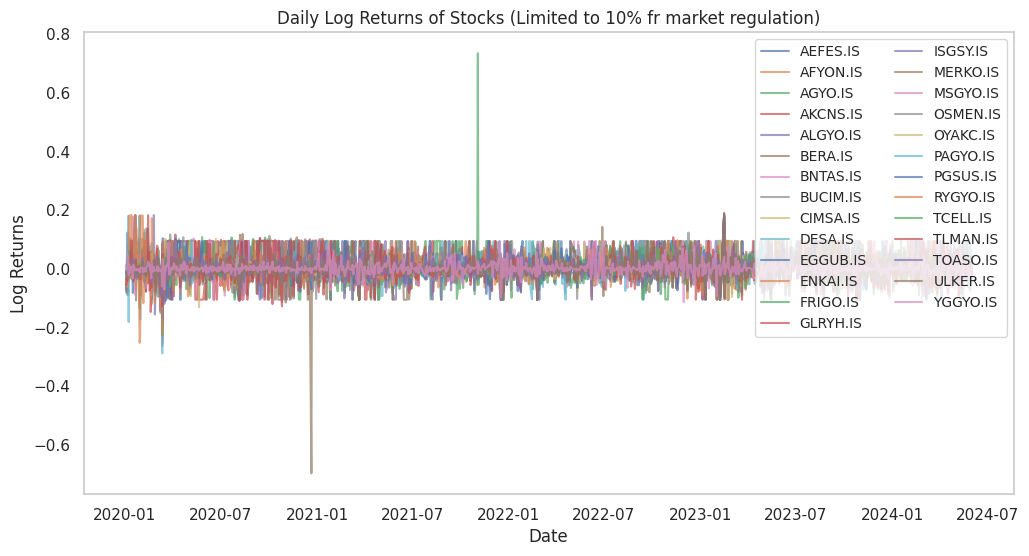

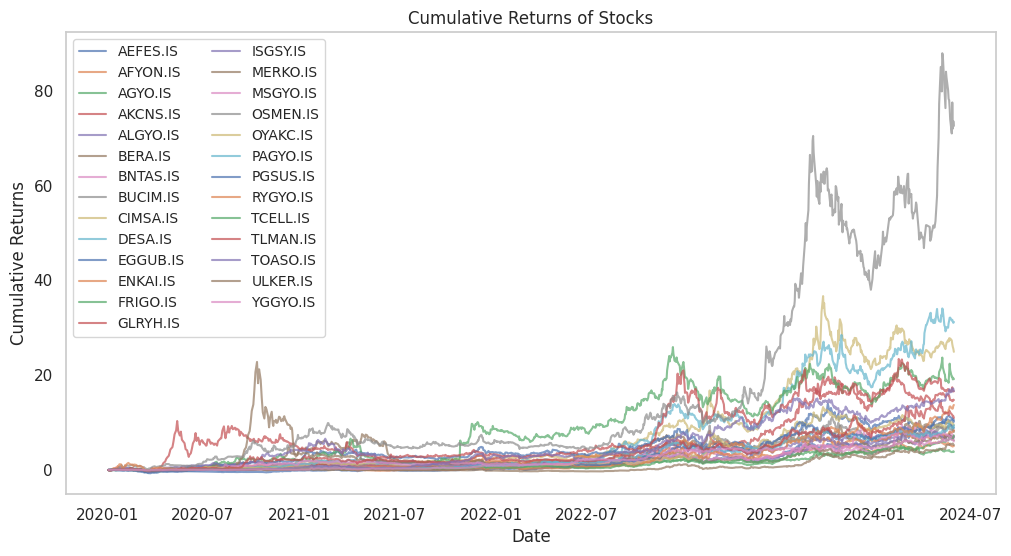

<Figure size 1200x600 with 0 Axes>

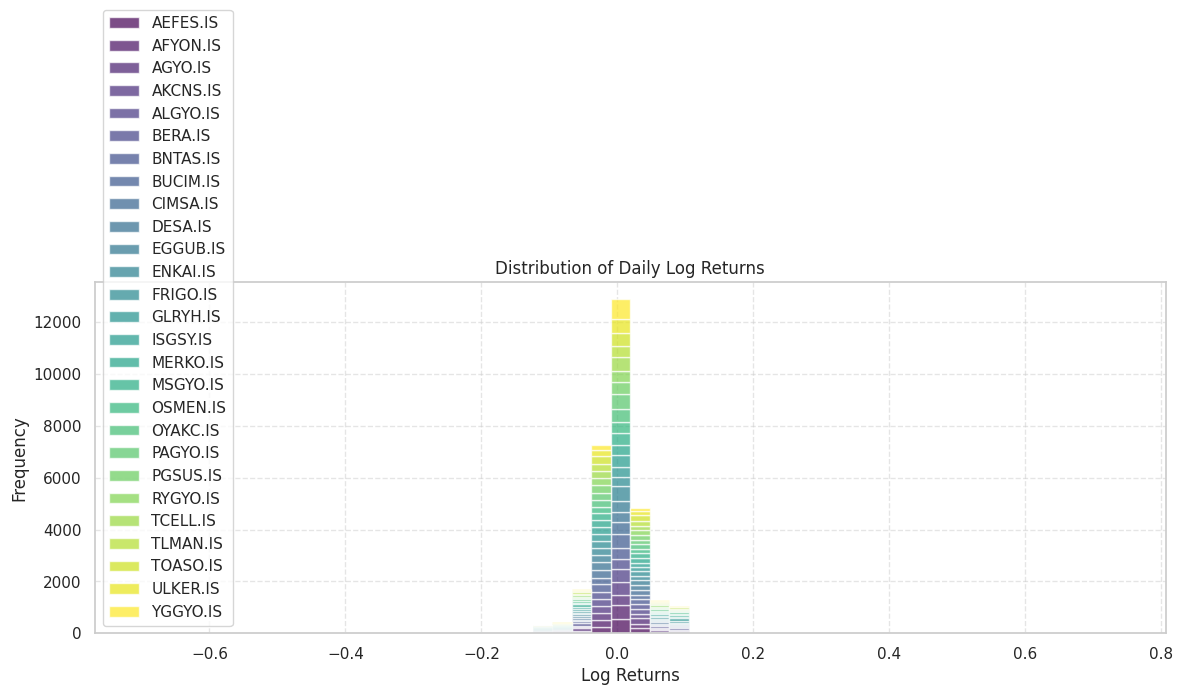

In [401]:
import matplotlib.pyplot as plt

# Plot individual stock daily returns
plt.figure(figsize=(12, 6))
for stock in hist_return.columns:
    plt.plot(hist_return.index, hist_return[stock], label=stock, alpha=0.7)
plt.title("Daily Log Returns of Stocks (Limited to 10% fr market regulation)")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid()
plt.show()

# Plot cumulative returns for each stock
cumulative_returns = np.exp(hist_return.cumsum()) - 1  # Convert log returns to cumulative returns
plt.figure(figsize=(12, 6))
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock, alpha=0.7)
plt.title("Cumulative Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(loc="upper left", fontsize="small", ncol=2)
plt.grid()
plt.show()

# Distribution of daily returns for all stocks
plt.figure(figsize=(12, 6))
hist_return.plot(kind='hist', bins=50, alpha=0.7, figsize=(12, 6), stacked=True, colormap="viridis")
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


In [402]:
hist_data

AEFES.IS   AFYON.IS   AGYO.IS    AKCNS.IS   ALGYO.IS    BERA.IS  \
Date                                                                            
2020-01-02   17.703104   2.158019  1.777248    9.048207   2.717932   1.900633   
2020-01-03   17.595812   2.076456  1.667316    8.445592   2.516383   1.816491   
2020-01-06   17.212627   1.943916  1.529899    8.166772   2.848345   1.677903   
2020-01-07   17.978996   2.107042  1.594027    8.580506   2.880948   1.747197   
2020-01-08   17.641796   2.083253  1.566544    8.373639   2.756462   1.707600   
...                ...        ...       ...         ...        ...        ...   
2024-05-27  205.550003  13.000298  8.411528  142.000000  21.698679  19.320000   
2024-05-28  206.399994  12.864474  8.470695  140.199997  21.429316  18.700001   
2024-05-29  199.699997  12.748054  8.579166  140.399994  21.149977  17.910000   
2024-05-30  195.199997  13.058509  8.746805  143.100006  20.970402  18.110001   
2024-05-31  199.000000  13.010000  8.539722  142.500000  21.139999  17.650000   

             BNTAS.IS  BUCIM.IS   CIMSA.IS    DESA.IS  ...    OSMEN.IS  \
Date                                                   ...               
2020-01-02   1.439004  0.902695   1.195407   0.906086  ...    3.432208   
2020-01-03   1.327453  0.848366   1.167159   0.861886  ...    3.260597   
2020-01-06   1.238212  0.810753   1.142763   0.787551  ...    3.389305   
2020-01-07   1.316298  0.826077   1.150467   0.833759  ...    3.543754   
2020-01-08   1.277255  0.821898   1.126071   0.819696  ...    3.535174   
...               ...       ...        ...        ...  ...         ...   
2024-05-27  12.350000  8.493618  33.860001  29.480000  ...  247.173294   
2024-05-28  11.860000  8.493618  32.900002  29.600000  ...  269.643585   
2024-05-29  12.080000  8.354866  32.220001  29.299999  ...  250.676956   
2024-05-30  11.600000  8.226025  31.760000  29.020000  ...  256.079498   
2024-05-31  11.540000  8.117004  30.980000  29.200001  ...  252.621887   

             OYAKC.IS   PAGYO.IS    PGSUS.IS   RYGYO.IS   TCELL.IS  \
Date                                                                 
2020-01-02   1.500000   4.356612   17.575089   0.688520  11.696466   
2020-01-03   1.428205   4.412917   16.971521   0.661752  11.546512   
2020-01-06   1.369230   4.251040   16.327032   0.624575  11.404887   
2020-01-07   1.371794   5.088580   16.265654   0.629037  11.579834   
2020-01-08   1.356410   4.244002   15.754154   0.605243  11.538181   
...               ...        ...         ...        ...        ...   
2024-05-27  16.525640  42.854877  210.500000   9.645000  86.884705   
2024-05-28  16.179487  42.701756  209.899994   9.570000  87.999855   
2024-05-29  15.897436  43.543922  204.600006   9.605000  88.824097   
2024-05-30  16.064102  42.606056  206.300003  10.000000  92.848335   
2024-05-31  15.551282  45.362244  201.800003  10.115000  96.581657   

              TLMAN.IS    TOASO.IS    ULKER.IS   YGGYO.IS  
Date                                                       
2020-01-02    9.478801   17.478039   21.853039   6.224741  
2020-01-03    8.972909   17.256134   21.454674   6.205424  
2020-01-06    8.715527   17.073391   20.961462   6.234399  
2020-01-07    8.955159   17.347506   21.606432   6.538634  
2020-01-08    8.848657   17.504143   22.099642   6.398590  
...                ...         ...         ...        ...  
2024-05-27  120.699997  305.000000  139.000000  45.520786  
2024-05-28  119.500000  317.750000  141.800003  45.331905  
2024-05-29  116.800003  317.000000  143.399994  45.445232  
2024-05-30  117.000000  316.750000  138.300003  44.935253  
2024-05-31  113.400002  308.750000  136.500000  43.537514  

[1106 rows x 27 columns]

In [403]:
hist_return.head()

AEFES.IS  AFYON.IS   AGYO.IS  AKCNS.IS  ALGYO.IS   BERA.IS  \
Date                                                                     
2020-01-03 -0.006079 -0.038528 -0.063851 -0.068922 -0.077048 -0.045281   
2020-01-06 -0.022018 -0.065958 -0.086013 -0.033571  0.123915 -0.079362   
2020-01-07  0.043561  0.080580  0.041062  0.049419  0.011381  0.040468   
2020-01-08 -0.018933 -0.011354 -0.017392 -0.024404 -0.044171 -0.022924   
2020-01-09  0.037515  0.046223  0.051293  0.054350  0.013351  0.042560   

            BNTAS.IS  BUCIM.IS  CIMSA.IS   DESA.IS  ...  OSMEN.IS  OYAKC.IS  \
Date                                                ...                       
2020-01-03 -0.080689 -0.062073 -0.023914 -0.050011  ... -0.051293 -0.049047   
2020-01-06 -0.069594 -0.045348 -0.021124 -0.090195  ...  0.038715 -0.042170   
2020-01-07  0.061155  0.018724  0.006719  0.057016  ...  0.044562  0.001871   
2020-01-08 -0.030110 -0.005071 -0.021434 -0.017011  ... -0.002424 -0.011278   
2020-01-09  0.055216  0.057629  0.043509  0.045517  ...  0.045085  0.029797   

            PAGYO.IS  PGSUS.IS  RYGYO.IS  TCELL.IS  TLMAN.IS  TOASO.IS  \
Date                                                                     
2020-01-03  0.012841 -0.034946 -0.039654 -0.012903 -0.054848 -0.012777   
2020-01-06 -0.037372 -0.038715 -0.057819 -0.012341 -0.029104 -0.010647   
2020-01-07  0.179835 -0.003766  0.007119  0.015223  0.027124  0.015928   
2020-01-08 -0.181492 -0.031952 -0.038560 -0.003603 -0.011964  0.008989   
2020-01-09  0.018078  0.025009  0.181502  0.059562  0.047978  0.025765   

            ULKER.IS  YGGYO.IS  
Date                            
2020-01-03 -0.018397 -0.003108  
2020-01-06 -0.023257  0.004658  
2020-01-07  0.030305  0.047646  
2020-01-08  0.022570 -0.021651  
2020-01-09  0.040376  0.014982  

[5 rows x 27 columns]

In [404]:
mean_returns.head(20)

AEFES.IS    0.636711
AFYON.IS    0.543804
AGYO.IS     0.550150
AKCNS.IS    0.762252
ALGYO.IS    0.581245
BERA.IS     0.714444
BNTAS.IS    0.648980
BUCIM.IS    0.628179
CIMSA.IS    0.871731
DESA.IS     0.989866
EGGUB.IS    0.668508
ENKAI.IS    0.599065
FRIGO.IS    0.991327
GLRYH.IS    0.907138
ISGSY.IS    0.681580
MERKO.IS    0.711618
MSGYO.IS    0.611889
OSMEN.IS    1.188801
OYAKC.IS    0.653762
PAGYO.IS    0.641848
dtype: float64

In [405]:
cov_matrix.head(25)

AEFES.IS  AFYON.IS   AGYO.IS  AKCNS.IS  ALGYO.IS   BERA.IS  \
AEFES.IS  0.168752  0.062906  0.068535  0.072678  0.075214  0.068915   
AFYON.IS  0.062906  0.270300  0.109062  0.144577  0.102035  0.112155   
AGYO.IS   0.068535  0.109062  0.383741  0.094523  0.100682  0.099578   
AKCNS.IS  0.072678  0.144577  0.094523  0.268802  0.110825  0.108275   
ALGYO.IS  0.075214  0.102035  0.100682  0.110825  0.226950  0.110512   
BERA.IS   0.068915  0.112155  0.099578  0.108275  0.110512  0.415969   
BNTAS.IS  0.080773  0.113939  0.128070  0.098640  0.114007  0.127465   
BUCIM.IS  0.071896  0.150594  0.097151  0.136727  0.110336  0.114753   
CIMSA.IS  0.069801  0.156032  0.096416  0.174163  0.106889  0.122836   
DESA.IS   0.063520  0.097750  0.099787  0.075024  0.075923  0.102774   
EGGUB.IS  0.082342  0.089374  0.093189  0.095745  0.109977  0.118960   
ENKAI.IS  0.066121  0.062374  0.063260  0.074741  0.086762  0.072906   
FRIGO.IS  0.077778  0.084722  0.095707  0.067672  0.085347  0.109530   
GLRYH.IS  0.046192  0.065134  0.052615  0.056912  0.072429  0.086205   
ISGSY.IS  0.072628  0.096295  0.122775  0.082902  0.099605  0.119325   
MERKO.IS  0.060841  0.082367  0.083985  0.078840  0.100575  0.112151   
MSGYO.IS  0.061321  0.087871  0.094049  0.083425  0.087624  0.100229   
OSMEN.IS  0.075097  0.079225  0.084604  0.075272  0.085074  0.086551   
OYAKC.IS  0.060199  0.159028  0.081674  0.131969  0.093295  0.085175   
PAGYO.IS  0.057673  0.062586  0.080342  0.069917  0.076915  0.063858   
PGSUS.IS  0.091977  0.086953  0.094433  0.095895  0.090872  0.115546   
RYGYO.IS  0.072373  0.099423  0.121170  0.098773  0.123711  0.127686   
TCELL.IS  0.072004  0.059487  0.061599  0.076227  0.076454  0.070058   
TLMAN.IS  0.082195  0.102000  0.101984  0.102174  0.111354  0.110881   
TOASO.IS  0.070484  0.082494  0.091855  0.089637  0.091152  0.085782   

          BNTAS.IS  BUCIM.IS  CIMSA.IS   DESA.IS  ...  OSMEN.IS  OYAKC.IS  \
AEFES.IS  0.080773  0.071896  0.069801  0.063520  ...  0.075097  0.060199   
AFYON.IS  0.113939  0.150594  0.156032  0.097750  ...  0.079225  0.159028   
AGYO.IS   0.128070  0.097151  0.096416  0.099787  ...  0.084604  0.081674   
AKCNS.IS  0.098640  0.136727  0.174163  0.075024  ...  0.075272  0.131969   
ALGYO.IS  0.114007  0.110336  0.106889  0.075923  ...  0.085074  0.093295   
BERA.IS   0.127465  0.114753  0.122836  0.102774  ...  0.086551  0.085175   
BNTAS.IS  0.349592  0.107183  0.118252  0.115949  ...  0.111878  0.099681   
BUCIM.IS  0.107183  0.256705  0.142606  0.097728  ...  0.076278  0.135655   
CIMSA.IS  0.118252  0.142606  0.259734  0.088558  ...  0.085093  0.140921   
DESA.IS   0.115949  0.097728  0.088558  0.394780  ...  0.075384  0.064846   
EGGUB.IS  0.120781  0.101742  0.108382  0.083668  ...  0.089083  0.079524   
ENKAI.IS  0.085280  0.073583  0.083507  0.046750  ...  0.059057  0.074715   
FRIGO.IS  0.112825  0.088046  0.079754  0.110524  ...  0.089515  0.071001   
GLRYH.IS  0.089589  0.073458  0.055360  0.074752  ...  0.090340  0.058397   
ISGSY.IS  0.114993  0.091362  0.087947  0.095628  ...  0.094810  0.073518   
MERKO.IS  0.123578  0.091875  0.086486  0.082247  ...  0.096649  0.067679   
MSGYO.IS  0.111316  0.087059  0.084262  0.094535  ...  0.071639  0.070415   
OSMEN.IS  0.111878  0.076278  0.085093  0.075384  ...  0.418432  0.067838   
OYAKC.IS  0.099681  0.135655  0.140921  0.064846  ...  0.067838  0.242321   
PAGYO.IS  0.083874  0.067892  0.064469  0.072028  ...  0.065676  0.053469   
PGSUS.IS  0.102097  0.099007  0.100038  0.107146  ...  0.097573  0.083673   
RYGYO.IS  0.142758  0.113709  0.104982  0.126732  ...  0.110392  0.087632   
TCELL.IS  0.078375  0.068173  0.079274  0.057300  ...  0.064340  0.068939   
TLMAN.IS  0.134943  0.105338  0.112870  0.095503  ...  0.121501  0.085812   
TOASO.IS  0.088333  0.098402  0.097359  0.080620  ...  0.075010  0.081731   

          PAGYO.IS  PGSUS.IS  RYGYO.IS  TCELL.IS  TLMAN.IS  TOASO.IS  \
AEFES.IS  0.057673  0.091977  0.072373  0.072004  0.082195  0.

## Target Return Portfolio Optimization

The code calculates a portfolio that minimizes risk while achieving a specific return target, constrained to long-only allocations.
Results are visualized to help interpret the optimal asset weights.
Practical constraints like no short selling and full investment (weights sum to 1) are incorporated into the model.


Optimal Portfolio Weights:
       Asset  Optimal Weight
0   AEFES.IS    1.026982e-01
1   AFYON.IS    2.086207e-02
2    AGYO.IS    3.456045e-03
3   AKCNS.IS    1.069171e-23
4   ALGYO.IS   -8.160877e-24
5    BERA.IS    9.756432e-03
6   BNTAS.IS    4.391235e-23
7   BUCIM.IS    4.841626e-24
8   CIMSA.IS    8.803895e-23
9    DESA.IS    2.035461e-02
10  EGGUB.IS    2.169913e-23
11  ENKAI.IS    7.659352e-02
12  FRIGO.IS    1.136881e-24
13  GLRYH.IS    2.836759e-02
14  ISGSY.IS    4.096263e-03
15  MERKO.IS    9.452957e-03
16  MSGYO.IS    2.454822e-02
17  OSMEN.IS    1.492789e-02
18  OYAKC.IS    3.966266e-02
19  PAGYO.IS    9.085608e-02
20  PGSUS.IS    1.951452e-25
21  RYGYO.IS   -3.870072e-24
22  TCELL.IS    1.248080e-01
23  TLMAN.IS   -2.361354e-23
24  TOASO.IS    1.167156e-02
25  ULKER.IS    1.594949e-02
26  YGGYO.IS    4.019384e-01
      Asset  Optimal Weight
0  AEFES.IS    1.026982e-01
1  AFYON.IS    2.086207e-02
2   AGYO.IS    3.456045e-03
3  AKCNS.IS    1.069171e-23
4  ALGYO.IS   -8.160

<ipython-input-406-1b38b920264f>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




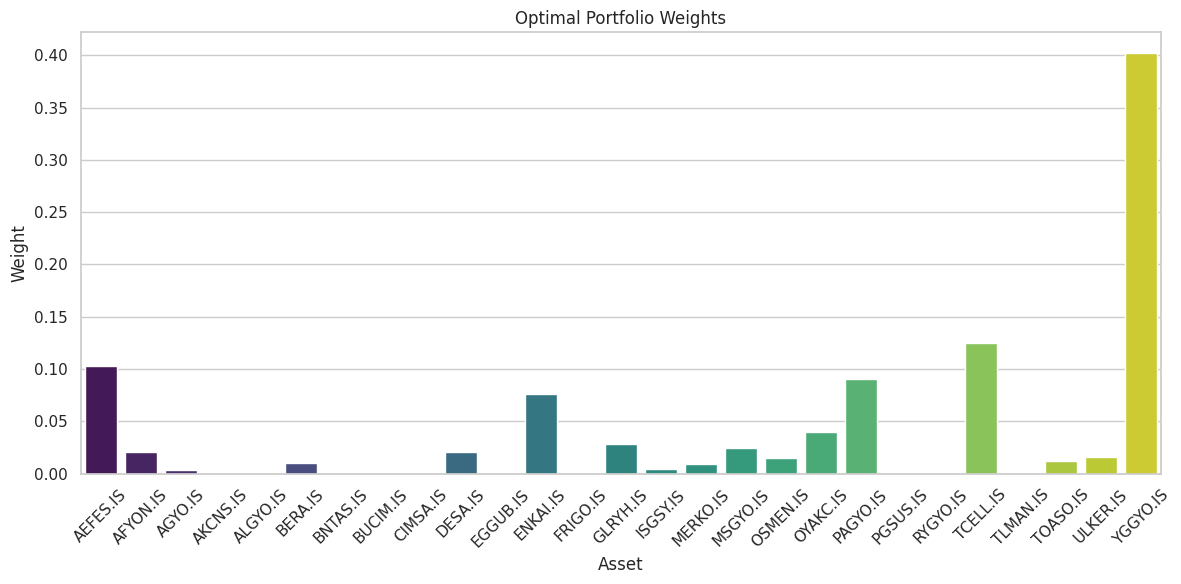

In [406]:

num_assets = len(mean_returns)
weights = cp.Variable(num_assets)  # Portfolio weights

# Define portfolio return and risk
portfolio_return = mean_returns.values.T @ weights
portfolio_variance = cp.quad_form(weights, cov_matrix.values)  # Quadratic form for variance

# **Reformulate the objective:** Minimize risk subject to a target return and long-only constraint
objective = cp.Minimize(portfolio_variance)

# Constraints: Weights sum to 1, are non-negative, and meet a target return
constraints = [
    cp.sum(weights) == 1,
    weights >= 0,
    portfolio_return >= risk_free_rate + 0.10  # Example: Target return 10% above risk-free rate
]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Retrieve optimal weights
optimal_weights = weights.value

# Create a DataFrame for optimal weights
# Ensure 'Asset' is a string, not a tuple or MultiIndex
portfolio_df = pd.DataFrame({
    'Asset': [str(asset) for asset in mean_returns.index],
    'Optimal Weight': optimal_weights
})

# Print the results
print("\nOptimal Portfolio Weights:")
print(portfolio_df)
# Ensure 'Asset' column is a single string and not a tuple or MultiIndex
if isinstance(portfolio_df['Asset'].iloc[0], tuple):
    portfolio_df['Asset'] = portfolio_df['Asset'].apply(lambda x: x[0])  # Extract the first element

# Clean column names (ensure no MultiIndex issues)
portfolio_df.columns = ['Asset', 'Optimal Weight']

# Verify the cleaned DataFrame
print(portfolio_df.head())

# Plot the weights
plt.figure(figsize=(12, 6))
sns.barplot(x='Asset', y='Optimal Weight', data=portfolio_df, palette='viridis')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=45)
plt.ylabel('Weight')
plt.xlabel('Asset')
plt.tight_layout()
plt.show()


In [407]:
portfolio_df.to_csv('optimal_portfolio_weights.csv', index=False)

In [408]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Portfolio metrics
portfolio_target_return = np.dot(optimal_weights, mean_returns.to_numpy()) * 250  # Annualized return
portfolio_target_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix.values * 250, optimal_weights)))  # Annualized volatility

# Prepare the weights DataFrame
portfolio_df = portfolio_df.sort_values(by="Optimal Weight", ascending=False)

# --- Bar plot for portfolio weights ---
bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(
    x=portfolio_df["Asset"],
    y=portfolio_df["Optimal Weight"],
    marker_color=np.where(portfolio_df["Optimal Weight"] > 0, "green", "red"),
    text=portfolio_df["Optimal Weight"].apply(lambda x: f"{x:.2%}"),
    textposition='outside',
    name="Portfolio Weights"
))
bar_fig.update_layout(
    title="Portfolio Weights for Target Return Portfolio",
    xaxis=dict(title="Assets", tickangle=45),
    yaxis=dict(title="Weights"),
    showlegend=False,
    height=500,
    width=800
)
bar_fig.show()

# --- Pie chart for long-only positions ---
long_weights = portfolio_df[portfolio_df["Optimal Weight"] > 0]  # Only long positions
pie_fig = go.Figure(
    go.Pie(
        labels=long_weights["Asset"],
        values=long_weights["Optimal Weight"],
        hole=0.3,
        title="Portfolio Allocation (Target Return Portfolio - Long Only)"
    )
)
pie_fig.update_traces(
    textinfo='percent+label',
    pull=[0.1 if w > 0.5 else 0 for w in long_weights["Optimal Weight"]]
)
pie_fig.update_layout(height=500, width=800)
pie_fig.show()

# --- Risk-return scatter plot ---
risk_return_fig = go.Figure()

# Add the target return portfolio point
risk_return_fig.add_trace(go.Scatter(
    x=[portfolio_target_volatility],
    y=[portfolio_target_return],
    mode='markers+text',
    text=["Target Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="orange", line=dict(width=2, color="black")),
    name="Target Return Portfolio"
))

# Update layout for scatter plot
risk_return_fig.update_layout(
    xaxis=dict(title="Risk (Standard Deviation)", range=[0, portfolio_target_volatility * 1.5]),
    yaxis=dict(title="Return (Expected Return)", range=[0, portfolio_target_return * 1.5]),
    height=500,
    width=800,
    title="Risk-Return Tradeoff for Target Return Portfolio"
)
risk_return_fig.show()


##Global Minimum Variance Portfolio

The code computes the Global Minimum Variance Portfolio, which minimizes portfolio risk (variance) without targeting any specific return.
Constraints:
Portfolio weights must sum to 1 (fully invested).
The solution is long-only (weights ≥ 0 by default in CVXOPT).
Numerical Stability:
Adding a small diagonal term to the covariance matrix ensures the optimization process remains stable.
Output:
Provides optimal asset weights and the corresponding portfolio risk for 21 assets.
This is a classic approach for constructing the Global Minimum Variance Portfolio in a constrained optimization setting.

In [409]:
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers

# Ensure the covariance matrix is positive definite
# Use the existing 21x21 cov_matrix
cov_matrix = cov_matrix.to_numpy() * 252  # Annualize the original covariance matrix
cov_matrix += 1e-10 * np.eye(cov_matrix.shape[0])  # Add small value to diagonal for stability

# Get the number of valid assets (21 in this case)
num_valid_assets = cov_matrix.shape[0]

# Convert inputs to cvxopt matrices with the correct dimensions
P = matrix(cov_matrix, tc='d')  # Ensure the matrix is dense ('d')
q = matrix(np.zeros(num_valid_assets), tc='d')  # Zero linear term, matching num_valid_assets
A = matrix(1.0, (1, num_valid_assets), tc='d')  # Row matrix of ones for weight sum constraint
b = matrix(1.0, tc='d')  # Sum of weights = 1

# Solve the quadratic programming problem
solvers.options['show_progress'] = False
result = solvers.qp(P, q, A=A, b=b)

# Extract weights
optimal_weights = np.array(result['x']).flatten()  # Flatten for easier handling

# Create a DataFrame for optimal weights using valid assets
# Get the list of valid asset names from the covariance matrix index
valid_asset_names = hist_return.columns.tolist()  # Assuming 'hist_return' is your DataFrame of returns
weights_df = pd.DataFrame({
    'Asset': valid_asset_names,
    'Optimal Weight': optimal_weights
})

# Calculate portfolio standard deviation
portfolio_stdev = np.sqrt(optimal_weights.T @ cov_matrix @ optimal_weights) * np.sqrt(252)

# Print results
print("Global Minimum Variance Portfolio Weights (21 Assets):")
print(weights_df)
print("\nGMV Portfolio Volatility (Annualized):")
print(portfolio_stdev)

# Optional: Save the weights to a CSV for further analysis
weights_df.to_csv("gmv_portfolio_weights_21_assets.csv", index=False)

Global Minimum Variance Portfolio Weights (21 Assets):
       Asset  Optimal Weight
0   AEFES.IS        0.105486
1   AFYON.IS        0.036410
2    AGYO.IS        0.010505
3   AKCNS.IS       -0.006917
4   ALGYO.IS       -0.028961
5    BERA.IS        0.018750
6   BNTAS.IS       -0.030506
7   BUCIM.IS        0.002917
8   CIMSA.IS       -0.032041
9    DESA.IS        0.025785
10  EGGUB.IS        0.005590
11  ENKAI.IS        0.087740
12  FRIGO.IS       -0.000131
13  GLRYH.IS        0.028755
14  ISGSY.IS        0.008279
15  MERKO.IS        0.015504
16  MSGYO.IS        0.031208
17  OSMEN.IS        0.020489
18  OYAKC.IS        0.052736
19  PAGYO.IS        0.097732
20  PGSUS.IS        0.002702
21  RYGYO.IS       -0.024312
22  TCELL.IS        0.132895
23  TLMAN.IS       -0.002646
24  TOASO.IS        0.018031
25  ULKER.IS        0.018226
26  YGGYO.IS        0.405772

GMV Portfolio Volatility (Annualized):
61.22253478525271


In [410]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Prepare weights DataFrame
weights_gmv_df = pd.DataFrame({
    "Asset": weights_df["Asset"],  # Use asset names from weights_df
    "Weight": weights_df["Optimal Weight"]  # Use weights from weights_df
})
weights_gmv_df = weights_gmv_df.sort_values(by="Weight", ascending=False)  # Sort for better visualization

# GMV Portfolio Metrics
gmv_return = np.dot(optimal_weights, hist_return.mean().to_numpy()) * 252  # Annualized return
gmv_volatility = portfolio_stdev  # Already calculated as annualized volatility

# --- Bar plot for GMV portfolio weights ---
bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(
    x=weights_gmv_df["Asset"],
    y=weights_gmv_df["Weight"],
    marker_color=np.where(weights_gmv_df["Weight"] > 0, "green", "red"),
    text=weights_gmv_df["Weight"].apply(lambda x: f"{x:.2%}"),
    textposition='outside',
    name="Portfolio Weights"
))
bar_fig.update_layout(
    title="Portfolio Weights in Global Minimum Variance Portfolio",
    xaxis=dict(title="Assets", tickangle=45),
    yaxis=dict(title="Weights"),
    showlegend=False,
    height=500,
    width=800
)
bar_fig.show()

# --- Pie chart for GMV allocation ---
long_weights = weights_gmv_df[weights_gmv_df["Weight"] > 0]  # Only long positions
pie_fig = go.Figure(
    go.Pie(
        labels=long_weights["Asset"],
        values=long_weights["Weight"],
        hole=0.3,
        title="Portfolio Allocation (Long-Only Positions)"
    )
)
pie_fig.update_traces(
    textinfo='percent+label',
    pull=[0.1 if w > 0.5 else 0 for w in long_weights["Weight"]]
)
pie_fig.update_layout(height=500, width=800)
pie_fig.show()

# --- Risk-return scatter plot ---
risk_return_fig = go.Figure()
risk_return_fig.add_trace(go.Scatter(
    x=[gmv_volatility],
    y=[gmv_return],
    mode='markers+text',
    text=["GMV Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="blue", line=dict(width=2, color="black"))
))
risk_return_fig.update_layout(
    xaxis=dict(title="Risk (Standard Deviation)", range=[0, gmv_volatility * 1.5]),
    yaxis=dict(title="Return (Expected Return)", range=[0, gmv_return * 1.5]),
    height=500,
    width=800,
    title="Risk-Return Tradeoff for Global Minimum Variance Portfolio"
)
risk_return_fig.show()


## Max Return Portfolio

Objective:
Constructs a portfolio that maximizes the total return, constrained by full investment (weights sum to 1).
No Risk Minimization:
Unlike mean-variance optimization, this approach does not consider portfolio risk (volatility).
Long-Only Portfolio:
By default, CVXOPT enforces non-negative weights (long-only portfolio).


In [411]:
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers

# Ensure alignment between mean_returns and hist_cov
assert mean_returns.index.equals(hist_cov.index), "Indices of mean returns and covariance matrix must align."

# Convert mean returns and covariance matrix for use in optimization
mean_returns_array = mean_returns.to_numpy()
one_vec = np.ones(mean_returns.shape[0])

# Find maximum return
mu_o = np.max(mean_returns_array)

# Convert covariance matrix to cvxopt format (already regularized in earlier steps)
P = matrix(cov_matrix, tc='d')

# Zero linear term
q = matrix(np.zeros(mean_returns.shape[0]))

# Define constraints for the optimization
A_raw = np.vstack([mean_returns_array, one_vec])  # Combine mean returns and ones
A = matrix(A_raw, tc='d')  # Convert to cvxopt matrix
b = matrix([mu_o, 1.0], tc='d')  # Target return and sum of weights constraints

# Debugging inputs
print("Inputs to solvers.qp:")
print(f"P size: {P.size}")
print(f"q size: {q.size}")
print(f"A size: {A.size}")
print(f"b size: {b.size}")

# Solve the quadratic program
solvers.options['show_progress'] = True
result = solvers.qp(P, q, A=A, b=b)

# Extract weights
w_max_ret = np.array(result['x']).flatten()

# Convert weights to DataFrame
w_max_ret_df = pd.DataFrame({
    'Asset': mean_returns.index,  # Use indices from mean_returns
    'Weight': w_max_ret
}).sort_values(by="Weight", ascending=False)

# Display the results
print("Maximum Return Portfolio Weights:")
print(w_max_ret_df)


Inputs to solvers.qp:
P size: (27, 27)
q size: (27, 1)
A size: (2, 27)
b size: (2, 1)
Maximum Return Portfolio Weights:
       Asset    Weight
8   CIMSA.IS  0.359489
17  OSMEN.IS  0.350531
9    DESA.IS  0.257213
24  TOASO.IS  0.236445
13  GLRYH.IS  0.138786
18  OYAKC.IS  0.119246
3   AKCNS.IS  0.110505
0   AEFES.IS  0.105411
12  FRIGO.IS  0.100530
19  PAGYO.IS  0.092176
26  YGGYO.IS  0.084920
21  RYGYO.IS  0.052842
14  ISGSY.IS  0.016225
5    BERA.IS  0.014182
23  TLMAN.IS  0.013004
15  MERKO.IS  0.012642
11  ENKAI.IS  0.001241
10  EGGUB.IS -0.013526
16  MSGYO.IS -0.023792
20  PGSUS.IS -0.045863
2    AGYO.IS -0.071550
22  TCELL.IS -0.078411
6   BNTAS.IS -0.108829
7   BUCIM.IS -0.116414
4   ALGYO.IS -0.141678
25  ULKER.IS -0.174359
1   AFYON.IS -0.290965


In [412]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Prepare the weights DataFrame
weights_df = pd.DataFrame({
    "Ticker": mean_returns.index,  # List of assets
    "Weight": w_max_ret  # Optimized weights from the maximum return calculation
})
weights_df = weights_df.sort_values(by="Weight", ascending=False)  # Sort for better visualization

# Portfolio Metrics
portfolio_return = np.dot(w_max_ret, mean_returns.to_numpy()) * 250  # Annualized return
portfolio_volatility = np.sqrt(w_max_ret.T @ (cov_matrix @ w_max_ret)) * np.sqrt(250)  # Annualized volatility

# --- Bar plot for portfolio weights ---
bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(
    x=weights_df["Ticker"],
    y=weights_df["Weight"],
    marker_color=np.where(weights_df["Weight"] > 0, "green", "red"),
    text=weights_df["Weight"].apply(lambda x: f"{x:.2%}"),
    textposition='outside',
    name="Portfolio Weights"
))
bar_fig.update_layout(
    title="Portfolio Weights in Maximum Return Portfolio",
    xaxis=dict(title="Assets", tickangle=45),
    yaxis=dict(title="Weights"),
    showlegend=False,
    height=500,
    width=800
)
bar_fig.show()

# --- Pie chart for long-only positions ---
long_weights = weights_df[weights_df["Weight"] > 0]  # Only long positions
pie_fig = go.Figure(
    go.Pie(
        labels=long_weights["Ticker"],
        values=long_weights["Weight"],
        hole=0.3,
        title="Portfolio Allocation (Long-Only Positions)"
    )
)
pie_fig.update_traces(
    textinfo='percent+label',
    pull=[0.1 if w > 0.5 else 0 for w in long_weights["Weight"]]
)
pie_fig.update_layout(height=500, width=800)
pie_fig.show()

# --- Risk-return scatter plot ---
risk_return_fig = go.Figure()
risk_return_fig.add_trace(go.Scatter(
    x=[portfolio_volatility],
    y=[portfolio_return],
    mode='markers+text',
    text=["Max Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="blue", line=dict(width=2, color="black"))
))
risk_return_fig.update_layout(
    xaxis=dict(title="Risk (Standard Deviation)", range=[0, portfolio_volatility * 1.5]),
    yaxis=dict(title="Return (Expected Return)", range=[0, portfolio_return * 1.5]),
    height=500,
    width=800,
    title="Risk-Return Tradeoff for Maximum Return Portfolio"
)
risk_return_fig.show()


## Maximum Sharpe Portfolio

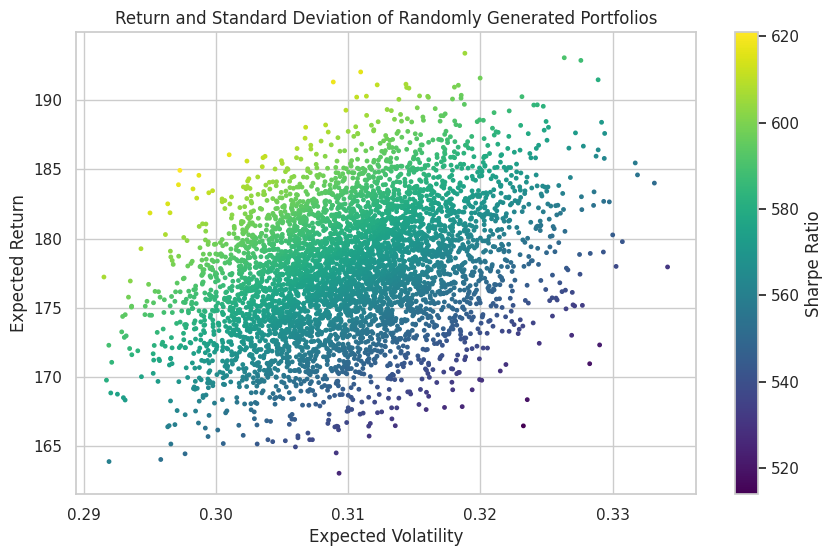

Highest Sharpe Ratio Portfolio:
Sharpe Ratio: 620.92
Return: 184.92, Volatility: 0.30


In [413]:
import numpy as np
import matplotlib.pyplot as plt


# Ensure alignment between mean_returns and hist_cov
aligned_assets = mean_returns.index.intersection(hist_cov.columns)  # Ensure common assets
mean_returns = mean_returns.loc[aligned_assets]  # Align mean_returns with common assets
hist_cov = hist_cov.loc[aligned_assets, aligned_assets]  # Align hist_cov with common assets

# Set up simulation parameters
n_portfolios = 5000
port_returns = np.zeros(n_portfolios)
port_stdevs = np.zeros(n_portfolios)
sharpe_ratios = np.zeros(n_portfolios)

# Simulate random portfolios
for i in range(n_portfolios):
    # Generate and normalize random weights
    w = np.random.rand(len(aligned_assets))
    w /= np.sum(w)  # Normalize weights

    # Calculate portfolio return and volatility
    port_return = np.dot(w.T, mean_returns.values) * 250  # Annualized return
    port_stdev = np.sqrt(np.dot(w.T, np.dot(hist_cov.values, w))) * np.sqrt(250)  # Annualized volatility

    # Calculate Sharpe Ratio
    sharpe_ratio = (port_return - risk_free_rate) / port_stdev

    # Store results
    port_returns[i] = port_return
    port_stdevs[i] = port_stdev
    sharpe_ratios[i] = sharpe_ratio

# Plot results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(port_stdevs, port_returns, c=sharpe_ratios, cmap='viridis', s=6)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Return and Standard Deviation of Randomly Generated Portfolios')
plt.grid(True)
plt.show()

# Identify the portfolio with the highest Sharpe ratio
max_sharpe_idx = sharpe_ratios.argmax()
max_sharpe_return = port_returns[max_sharpe_idx]
max_sharpe_stdev = port_stdevs[max_sharpe_idx]

print(f"Highest Sharpe Ratio Portfolio:\nSharpe Ratio: {sharpe_ratios[max_sharpe_idx]:.2f}")
print(f"Return: {max_sharpe_return:.2f}, Volatility: {max_sharpe_stdev:.2f}")


In [414]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Ensure inputs are aligned
aligned_assets = mean_returns.index.intersection(hist_cov.columns)
mean_returns_aligned = mean_returns.loc[aligned_assets]
hist_cov_aligned = hist_cov.loc[aligned_assets, aligned_assets]

# Define quadratic programming inputs
P = matrix(hist_cov_aligned.to_numpy() * 250, tc='d')  # Annualized covariance matrix
q = matrix(np.zeros(len(mean_returns_aligned)), tc='d')  # Zero linear term
one_vec = np.ones(mean_returns_aligned.shape[0])
A = matrix(np.vstack((mean_returns_aligned.to_numpy().T, one_vec)), tc='d')  # Return and weight sum constraints

# Efficient frontier calculation
N = 100  # Number of points on the efficient frontier
ef_left = mean_returns_aligned.to_numpy().min().item()  # Minimum return
ef_right = mean_returns_aligned.to_numpy().max().item()  # Maximum return # Maximum annualized return
target_returns = np.linspace(ef_left, ef_right, N)

ef_returns = []
ef_risks = []
for target in target_returns:
    b = matrix([target, 1.0], (2, 1), tc='d')  # Target return and sum of weights
    sol = solvers.qp(P, q, A=A, b=b)
    weights = np.array(sol['x']).flatten()  # Extract optimal weights
    ef_returns.append(np.dot(weights, mean_returns_aligned.to_numpy()) * 250)  # Annualized return
    ef_risks.append(np.sqrt(np.dot(weights.T, np.dot(hist_cov_aligned.to_numpy() * 250, weights))))  # Annualized volatility

# Generate random portfolios
num_portfolios = 5000
port_returns = []
port_stdevs = []
for _ in range(num_portfolios):
    weights = np.random.rand(len(aligned_assets))
    weights /= np.sum(weights)  # Normalize weights
    portfolio_return = np.dot(weights, mean_returns_aligned.to_numpy()) * 250
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(hist_cov_aligned.to_numpy() * 250, weights)))
    port_returns.append(portfolio_return)
    port_stdevs.append(portfolio_risk)

# Convert to arrays for plotting
port_returns = np.array(port_returns)
port_stdevs = np.array(port_stdevs)

# Create Plotly Figure
fig = go.Figure()

# Add scatter plot for random portfolios
fig.add_trace(go.Scatter(
    x=port_stdevs,
    y=port_returns,
    mode='markers',
    marker=dict(color='blue', size=5, opacity=0.6),
    name='Candidate Market Portfolios'
))

# Add line for efficient frontier
fig.add_trace(go.Scatter(
    x=ef_risks,
    y=ef_returns,
    mode='lines+markers',
    line=dict(color='green', width=2),
    marker=dict(size=8),
    name='Efficient Frontier'
))

# Update layout
fig.update_layout(
    title="Efficient Frontier and Candidate Market Portfolios",
    xaxis=dict(title="Risk (Standard Deviation)", zeroline=True),
    yaxis=dict(title="Return (Expected Return)", zeroline=True),
    height=600,
    width=900,
    legend=dict(x=0.8, y=0.2, title="Legend"),
    template="plotly_white"
)

# Show the plot
fig.show()

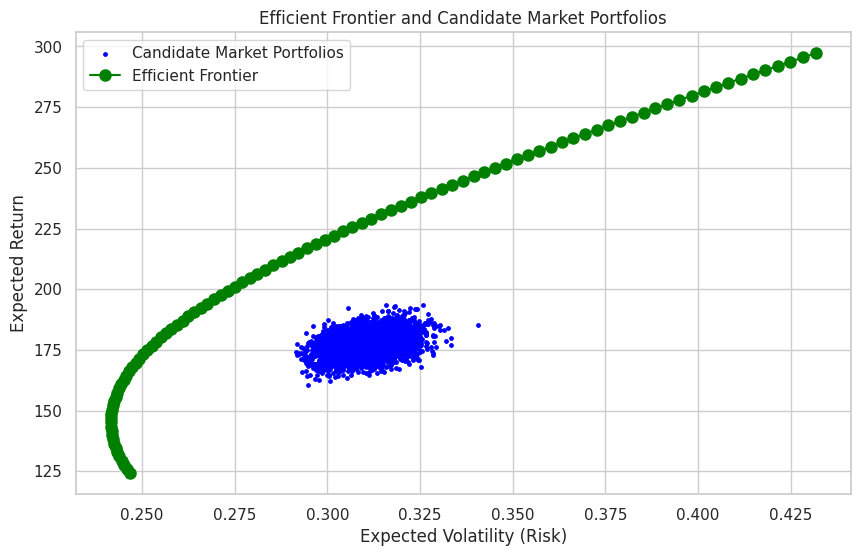

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
%matplotlib inline

# Define parameters
N = 100  # Efficient frontier resolution
num_portfolios = 5000  # Number of random portfolios

# Define the return range for the efficient frontier

ef_left = mean_returns.to_numpy().min().item()  # Minimum return
ef_right = mean_returns.to_numpy().max().item()  # Maximum return
target_returns = np.linspace(ef_left, ef_right, N)

# Calculate optimal weights for each target return on the efficient frontier
optimal_weights = [solvers.qp(P, q, A=A, b=matrix([t, 1], (2, 1)))['x'] for t in target_returns]

# Compute efficient frontier returns and risks
ef_returns = [np.dot(w.T, mean_returns.to_numpy()).item() * 250 for w in optimal_weights]  # Annualized returns
ef_risks = [np.sqrt(np.dot(w.T, np.dot(hist_cov.to_numpy(), w)).item() * 250) for w in optimal_weights]  # Annualized volatility

# Align mean_returns and hist_cov with the assets
aligned_assets = mean_returns.index.intersection(hist_cov.columns)
mean_returns_aligned = mean_returns.loc[aligned_assets]
hist_cov_aligned = hist_cov.loc[aligned_assets, aligned_assets]

# Generate random portfolios
port_returns = []
port_stdevs = []
for _ in range(num_portfolios):
    weights = np.random.rand(len(aligned_assets))  # Generate random weights for aligned assets
    weights /= np.sum(weights)  # Normalize weights to sum to 1

    # Calculate portfolio return and risk
    portfolio_return = np.dot(weights, mean_returns_aligned.to_numpy()) * 250  # Annualized return
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(hist_cov_aligned.to_numpy(), weights))) * np.sqrt(250)  # Annualized volatility

    # Append results
    port_returns.append(portfolio_return)
    port_stdevs.append(portfolio_risk)

# Convert results to arrays for plotting
port_returns = np.array(port_returns)
port_stdevs = np.array(port_stdevs)

# Plot Efficient Frontier and Candidate Market Portfolios
plt.figure(figsize=(10, 6))
plt.scatter(port_stdevs, port_returns, c='blue', s=6, label='Candidate Market Portfolios')
plt.plot(ef_risks, ef_returns, 'o-', color='green', markersize=8, label='Efficient Frontier')
plt.xlabel('Expected Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Candidate Market Portfolios')
plt.legend(loc='best')
plt.grid(True)
plt.show()



In [416]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

# Get the current list of assets used in the optimization
current_assets = mean_returns.index  # Use the index of mean_returns
num_assets = len(current_assets)
w_gmv = np.ones(num_assets) / num_assets  # Equal weights initialization

# Define the optimization function
fun = lambda w: -1 * (np.dot(w, mean_returns.to_numpy()) * 250 - risk_free_rate) / \
                (np.sqrt(np.dot(w.T, np.dot(cov_matrix * 250, w))))

# Constraints: Weights must sum to 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds for weights: Between 0 and 1
bounds = [(0, 1) for _ in range(num_assets)]

# Use SLSQP solver to find the optimal weights
res = minimize(fun, w_gmv, method='SLSQP', constraints=cons, bounds=bounds)

# Extract results
w_sharpe_v2 = res.x  # Optimal weights

# Create a DataFrame for the weights
w_sharpe_v2_df = pd.DataFrame(w_sharpe_v2, index=current_assets, columns=["Weight"]).sort_values(by="Weight", ascending=False)

# Calculate the portfolio metrics
mu_sharpe_v2 = np.dot(w_sharpe_v2, mean_returns.to_numpy()) * 250
stdev_sharpe_v2 = np.sqrt(np.dot(w_sharpe_v2.T, np.dot(cov_matrix * 250, w_sharpe_v2)))
sharpe_ratio_v2 = (mu_sharpe_v2 - risk_free_rate) / stdev_sharpe_v2

# Print the results
print("Maximum Sharpe Portfolio Weights:\n", w_sharpe_v2_df)
print(f"Expected Return (mu_sharpe): {mu_sharpe_v2:.4f}")
print(f"Standard Deviation (stdev_sharpe): {stdev_sharpe_v2:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio_v2:.4f}")


Maximum Sharpe Portfolio Weights:
                 Weight
YGGYO.IS  2.448454e-01
OSMEN.IS  1.577629e-01
DESA.IS   1.065793e-01
CIMSA.IS  9.561621e-02
TOASO.IS  8.324343e-02
GLRYH.IS  7.196941e-02
AEFES.IS  7.126464e-02
PAGYO.IS  6.375436e-02
FRIGO.IS  4.142733e-02
ENKAI.IS  2.831508e-02
TCELL.IS  1.902005e-02
AKCNS.IS  1.141458e-02
OYAKC.IS  4.787305e-03
AFYON.IS  2.626144e-16
AGYO.IS   2.479601e-16
BUCIM.IS  1.532859e-16
MSGYO.IS  1.224782e-16
ULKER.IS  1.194911e-16
BNTAS.IS  8.720079e-17
MERKO.IS  8.328325e-17
BERA.IS   5.578311e-17
ALGYO.IS  5.129830e-17
EGGUB.IS  4.861989e-17
ISGSY.IS  4.100391e-17
TLMAN.IS  3.830828e-17
RYGYO.IS  3.703974e-17
PGSUS.IS  2.730719e-17
Expected Return (mu_sharpe): 198.3353
Standard Deviation (stdev_sharpe): 70.9868
Sharpe Ratio: 2.7890


In [417]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
current_assets = mean_returns.index
# Prepare the weights DataFrame
weights_df = pd.DataFrame({
    "Ticker": current_assets,          # List of assets
    "Weight": w_sharpe_v2      # Optimized weights from the Sharpe ratio calculation
})
weights_df = weights_df.sort_values(by="Weight", ascending=False)  # Sort for better visualization

# Portfolio metrics
mu_sharpe = mu_sharpe_v2
stdev_sharpe = stdev_sharpe_v2
sharpe_ratio = sharpe_ratio_v2


# --- Bar plot for portfolio weights ---
bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(
    x=weights_df["Ticker"],
    y=weights_df["Weight"],
    marker_color=np.where(weights_df["Weight"] > 0, "green", "red"),
    text=weights_df["Weight"].apply(lambda x: f"{x:.2%}"),
    textposition='outside',
    name="Portfolio Weights"
))
bar_fig.update_layout(
    title="Portfolio Weights in Maximum Sharpe Ratio Portfolio",
    xaxis=dict(title="Assets", tickangle=45),
    yaxis=dict(title="Weights"),
    showlegend=False,
    height=500,
    width=800
)
bar_fig.show()

# --- Pie chart for long-only positions ---
long_weights = weights_df[weights_df["Weight"] > 0]  # Only long positions
pie_fig = go.Figure(
    go.Pie(
        labels=long_weights["Ticker"],
        values=long_weights["Weight"],
        hole=0.3,
        title="Portfolio Allocation (Long-Only Positions)"
    )
)
pie_fig.update_traces(
    textinfo='percent+label',
    pull=[0.1 if w > 0.5 else 0 for w in long_weights["Weight"]]
)
pie_fig.update_layout(height=500, width=800)
pie_fig.show()

# --- Risk-return scatter plot ---
risk_return_fig = go.Figure()
risk_return_fig.add_trace(go.Scatter(
    x=[stdev_sharpe],
    y=[mu_sharpe],
    mode='markers+text',
    text=["Max Sharpe Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="blue", line=dict(width=2, color="black"))
))
risk_return_fig.update_layout(
    xaxis=dict(title="Risk (Standard Deviation)", range=[0, stdev_sharpe * 1.5]),
    yaxis=dict(title="Return (Expected Return)", range=[0, mu_sharpe * 1.5]),
    height=500,
    width=800,
    title="Risk-Return Tradeoff for Maximum Sharpe Portfolio"
)
risk_return_fig.show()


In [418]:
print(f"Standard Deviation (stdev_sharpe): {stdev_sharpe}")
print(f"Expected Return (mu_sharpe): {mu_sharpe}")


Standard Deviation (stdev_sharpe): 70.98676578300734
Expected Return (mu_sharpe): 198.3352746058234


#Visualization

In [419]:
import plotly.graph_objects as go

# Risk-Return Metrics
# Global Minimum Variance (GMV) Portfolio
gmv_risk = gmv_volatility
gmv_return = gmv_return

# Maximum Sharpe Ratio Portfolio
sharpe_risk = stdev_sharpe
sharpe_return = mu_sharpe

# Maximum Return Portfolio
max_return_risk = portfolio_volatility
max_return_return = portfolio_return

# Create Scatter Plot
risk_return_fig = go.Figure()

# Add Global Minimum Variance Portfolio
risk_return_fig.add_trace(go.Scatter(
    x=[gmv_risk],
    y=[gmv_return],
    mode='markers+text',
    text=["GMV Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="green", line=dict(width=2, color="black")),
    name="GMV Portfolio"
))

risk_return_fig.add_trace(go.Scatter(
    x=ef_risks,
    y=ef_returns,
    mode='lines+markers',
    line=dict(color='green', width=2),
    marker=dict(size=8),
    name='Efficient Frontier'
))

# Add Maximum Sharpe Ratio Portfolio
risk_return_fig.add_trace(go.Scatter(
    x=[sharpe_risk],
    y=[sharpe_return],
    mode='markers+text',
    text=["Max Sharpe Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="blue", line=dict(width=2, color="black")),
    name="Max Sharpe Portfolio"
))

# Add Maximum Return Portfolio
risk_return_fig.add_trace(go.Scatter(
    x=[max_return_risk],
    y=[max_return_return],
    mode='markers+text',
    text=["Max Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="red", line=dict(width=2, color="black")),
    name="Max Return Portfolio"
))

risk_return_fig.add_trace(go.Scatter(
    x=[portfolio_target_volatility],
    y=[portfolio_target_return],
    mode='markers+text',
    text=["Target Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="orange", line=dict(width=2, color="black")),
    name="Target Return Portfolio"
))

# Update Layout
risk_return_fig.update_layout(
    xaxis=dict(title="Risk (Standard Deviation)", range=[0, max(max_return_risk, sharpe_risk, gmv_risk) * 1.5]),
    yaxis=dict(title="Return (Expected Return)", range=[0, max(max_return_return, sharpe_return, gmv_return) * 1.5]),
    height=600,
    width=800,
    title="Risk-Return Tradeoff for Different Portfolios",
    legend=dict(x=0.8, y=0.2, title="Portfolios")
)


# Show the Plot
risk_return_fig.show()


In [421]:
# Convert efficient frontier returns to percentages
ef_returns_percent = [r * 100 for r in ef_returns]


# Create Plotly Figure
fig = go.Figure()

# Add scatter plot for random portfolios
fig.add_trace(go.Scatter(
    x=port_stdevs,
    y=port_returns_percent,
    mode='markers',
    marker=dict(color='blue', size=5, opacity=0.6),
    name='Candidate Market Portfolios'
))

# Add line for efficient frontier
fig.add_trace(go.Scatter(
    x=ef_risks,
    y=ef_returns_percent,
    mode='lines+markers',
    line=dict(color='green', width=2),
    marker=dict(size=8),
    name='Efficient Frontier'
))

# Add individual portfolios
fig.add_trace(go.Scatter(
    x=[gmv_volatility],
    y=[gmv_portfolio_return_percent],
    mode='markers+text',
    text=["GMV Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="green", line=dict(width=2, color="black")),
    name="GMV Portfolio"
))

fig.add_trace(go.Scatter(
    x=[sharpe_risk],
    y=[sharpe_portfolio_return_percent],
    mode='markers+text',
    text=["Max Sharpe Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="blue", line=dict(width=2, color="black")),
    name="Max Sharpe Portfolio"
))

fig.add_trace(go.Scatter(
    x=[portfolio_volatility],
    y=[max_return_portfolio_return_percent],
    mode='markers+text',
    text=["Max Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="red", line=dict(width=2, color="black")),
    name="Max Return Portfolio"
))

fig.add_trace(go.Scatter(
    x=[portfolio_target_volatility],
    y=[target_portfolio_return_percent],
    mode='markers+text',
    text=["Target Return Portfolio"],
    textposition="top center",
    marker=dict(size=12, color="orange", line=dict(width=2, color="black")),
    name="Target Return Portfolio"
))

# Update layout
fig.update_layout(
    title="Risk-Return Tradeoff for Different Portfolios",
    xaxis=dict(title="Risk (Standard Deviation)", zeroline=True),
    yaxis=dict(title="Return (Expected Return, %)", zeroline=True),
    height=600,
    width=900,
    legend=dict(x=0.8, y=0.2, title="Legend"),
    template="plotly_white"
)

# Show the plot
fig.show()
